In [1]:
import os
import sys 
sys.path.remove('/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests')
sys.path.append('/Users/karolinagrzeszkiewicz/locomotion')
import locomotion 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm

In [2]:
FR_test_high = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_higher/Results_BDD.csv")
FR_test_low = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/FR_test_lower/Results_BDD.csv")
density_test_high = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/density_test_higher/Results_BDD.csv") 
density_test_low = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/results/density_test_lower/Results_BDD.csv")

In [3]:
#some data cleaning
FR_high_sequence = []
for i in range(24, 120, 2):
    FR_high_sequence.append(i)
    
FR_test_high.columns = FR_high_sequence
FR_test_high['curve_no'] = list(range(0,50))
FR_test_high = FR_test_high.melt(id_vars=["curve_no"],var_name= "FR", value_name= "Value")
FR_test_high.sort_values(by=['curve_no','FR'],inplace=True)

FR_low_sequence = []
for i in range(6, 24, 1):
    FR_low_sequence.append(i)
    
FR_test_low.columns = FR_low_sequence
FR_test_low['curve_no'] = list(range(0,50))
FR_test_low = FR_test_low.melt(id_vars=["curve_no"],var_name= "FR", value_name= "Value")
FR_test_low.sort_values(by=['curve_no','FR'],inplace=True)



In [4]:
density_high_sequence = [2.368992797258969, 3.2898658440840056, 5.473812199530617, 4.574146602662274, 
                         2.6141573284228126, 5.96774414486297, 4.919487032372022, 5.477229681809226, 
                         6.742887510799092, 2.345219811091552, 5.731522408977321, 3.993338537545986, 
                         7.889034959596039, 7.007766085735554, 4.217502998657783, 7.605826873681228,
                         2.0942184770464873, 2.542377644820858, 6.462880785207142, 2.549370957944128, 
                         7.137798629767561, 4.795589643398923, 6.045053445122158, 4.906692977326488, 
                         7.598186263992971, 4.833726585289512, 3.1708362804940107, 7.161979381629832,
                         5.306152816775535, 2.0872776459143214, 3.635836263604438, 6.165319987583199, 
                         2.0038089224212623, 7.533163519018309, 4.606802991494709, 5.123603390379272, 
                         7.976843833741872, 4.88059504692373, 6.726006046753367, 6.478311752285514,
                         7.5641876376455235, 3.709645474493994, 3.971763829555001, 2.8308933469802953, 
                         2.092628573464515, 2.344690794845139, 7.672325316009733, 3.905226532844937, 
                         3.444615738840314, 7.912618974332681]

#density values copied from the Results_variables.json file 
    
density_test_high.columns = density_high_sequence
density_test_high['curve_no'] = list(range(0,50))
density_test_high = density_test_high.melt(id_vars=["curve_no"],var_name= "density", value_name= "Value")
density_test_high.sort_values(by=['curve_no','density'],inplace=True)

density_low_sequence = [1.0906912451058035, 1.268479888157353, 1.1679789287915743, 1.6633547378982025, 
                        1.7321744370406937, 1.122045331110551, 1.2272947823777238, 0.8255097659351933, 
                        1.2916626185228084, 1.9371499257510707, 1.3530284234527397, 1.2013791915770669,
                        1.0328891792633028, 1.719768238512047, 0.7260818498032382, 1.2956324976020566, 
                        0.8138626893973424, 1.083666675641727, 0.5872537420307997, 1.6176015180698782, 
                        1.5944544810207444, 1.4769154852446387, 1.7144448832683261, 1.1889047509079453, 
                        1.4975589647608254, 1.7472224459326873, 0.8885039498009015, 0.5540597093138122, 
                        1.7885775630922738, 1.7963759381823556, 1.112417410993694, 1.1035645550893247, 
                        1.6817017739193096, 1.960848387207407, 1.4710519729614413, 0.7679457658315942, 
                        1.422682375926864, 1.9331329008370457, 1.1262315521264585, 1.303818727304506, 
                        1.9349910658067457, 0.9212269099361686, 1.631284465923661, 1.2742029423793777, 
                        1.1645463456276386, 1.1776386616022918, 0.9996399216968882, 1.2382198048648845, 
                        1.1723253337564363, 1.9242555125998462]
    
density_test_low.columns = density_low_sequence
density_test_low['curve_no'] = list(range(0,50))
density_test_low = density_test_low.melt(id_vars=["curve_no"],var_name= "density", value_name= "Value")
density_test_low.sort_values(by=['curve_no','density'],inplace=True)

In [5]:
density_test = pd.concat([density_test_low, density_test_high])
FR_test = pd.concat([FR_test_low, FR_test_high])

In [6]:
#assume we're given a data frame with 3 columns: 'curve_no', 'FR'/'RES', 'Value' (BDD) 
#important: if the data frame = 2 data frames merged then rememember not to double-count values for curves with meanVAR
#even if double counting it shouln't affect the outcome (only the number of curves will be greater)

def plotBDDforVar (data_Vartest, Var, meanVar):
    n_values = data_Vartest[Var].nunique()
    n_curves = int((len(data_Vartest.Value))/n_values) 
    colors = cm.rainbow(np.linspace(0, 1, 50))
    
    if Var == "FR":
        for i, c in zip(range(n_curves), colors):
            data = data_Vartest[data_Vartest.curve_no == i]
            data_curve = data[data.FR != meanVar]
            plt.scatter('FR','Value',data= data_curve[data_curve.curve_no == i], color = c)
        plt.title("BDD Value vs. Frame Rate (frames/sec) for " + str(n_curves) + " Randomly Generated Curves")
    elif Var == "density":
        for i, c in zip(range(n_curves), colors):
            data = data_Vartest[data_Vartest.curve_no == i]
            data_curve = data[data.density != meanVar]
            plt.scatter('density','Value',data= data_curve[data_curve.curve_no == i], color = c)
        plt.title("BDD Value vs. pixel density (px/mm) for " + str(n_curves) + " Randomly Generated Curves")
    else:
        print("The variable must be either FR (Frame Rate) or RES (Resolution)")

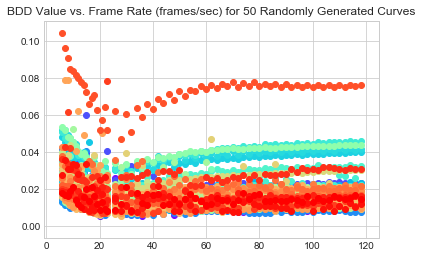

In [7]:
plotBDDforVar(FR_test, "FR", 24)

In [8]:
def plotBDDforVarSep (var, meanVar, curves = range(50)):
    colors = cm.rainbow(np.linspace(0, 1, 50))
    if var == "FR":
        for i, c in zip(curves, colors):
            data = FR_test[FR_test.curve_no == i]
            data = data[data.FR != meanVar]
            label = 'curve ' + str(i)
            xlab = 'FR' + ' for '+ label
            ylab = 'BDD value' + ' for '+ label
            ax = sns.jointplot(x = 'FR', y = 'Value', data = data)
            ax.set_axis_labels(xlab, ylab, fontsize=14)
    elif var == "density":
        for i in curves:
            data = density_test[density_test.curve_no == i]
            data = data[data.density != meanVar]
            label = 'density_test_curve ' + str(i)
            xlab = 'density' + ' for '+ label
            ylab = 'BDD value' + ' for '+ label
            ax = sns.jointplot(x='density',y='Value', data= data)
            ax.set_axis_labels(xlab, ylab, fontsize=14)
    else:
        print("There is no such variable as " + var)

In [9]:
#Find outliers for FR
FR_test[FR_test.Value > 0.06]
FR_outlier_curves = FR_test.curve_no[FR_test.Value > 0.06]
FR_outlier_curves.unique()
#curve_no 44 is an outlier

array([ 5, 38, 44, 45])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1676: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


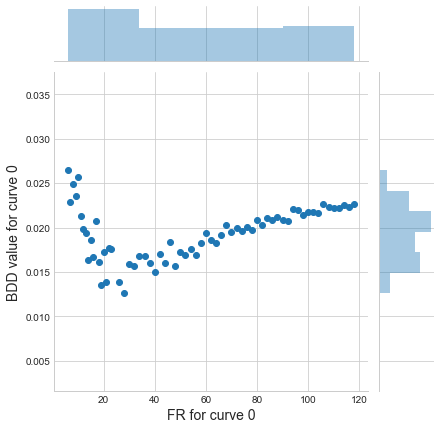

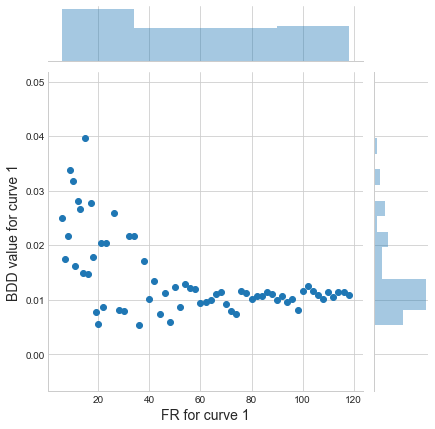

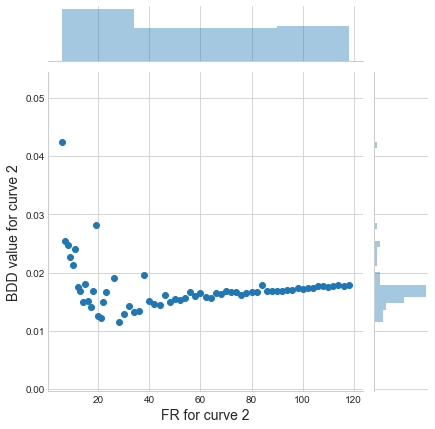

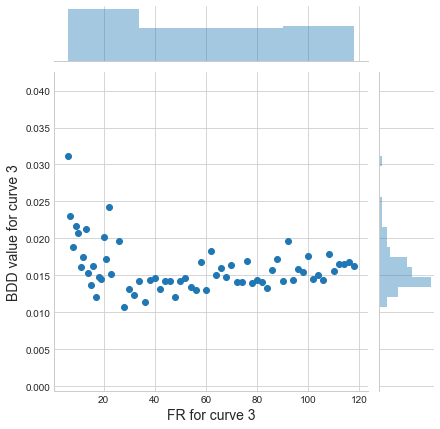

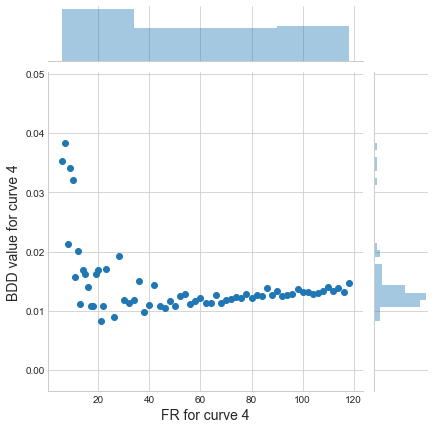

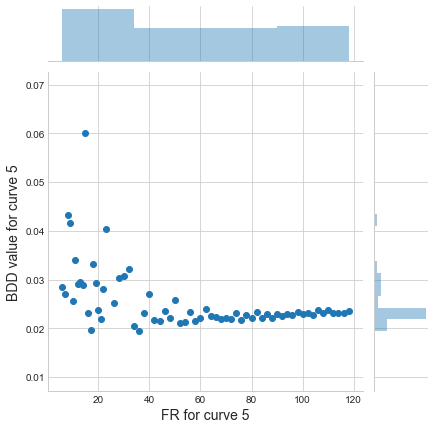

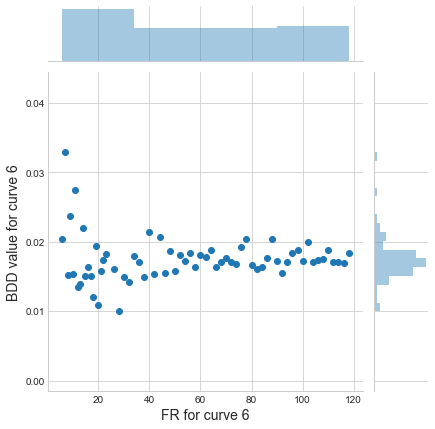

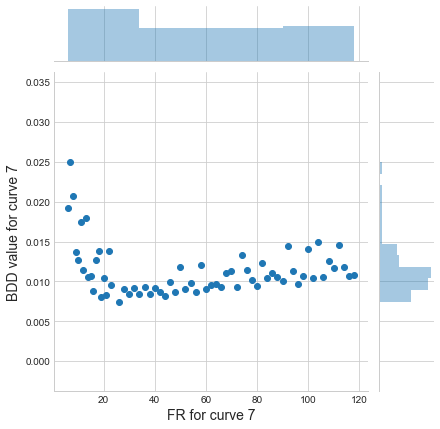

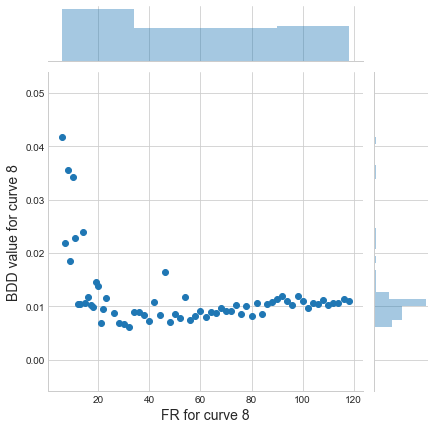

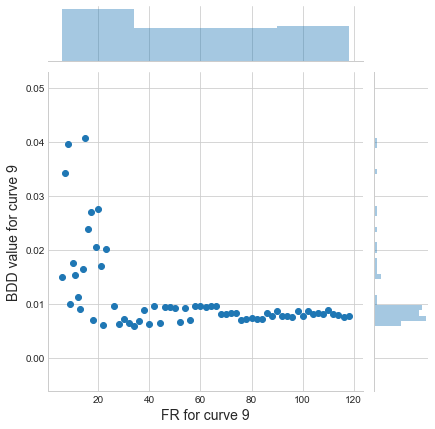

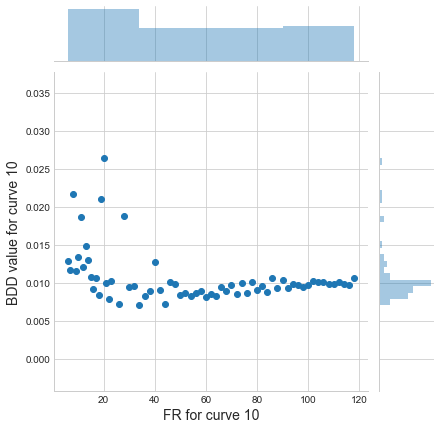

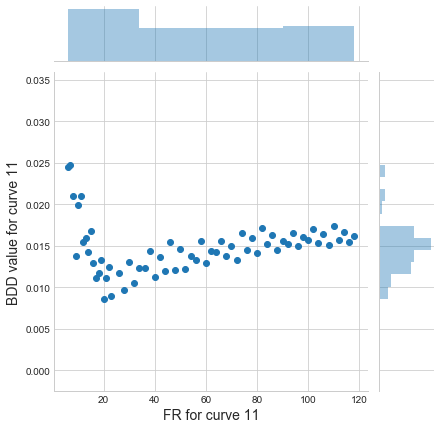

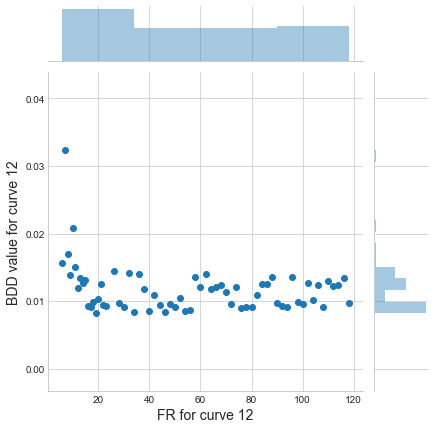

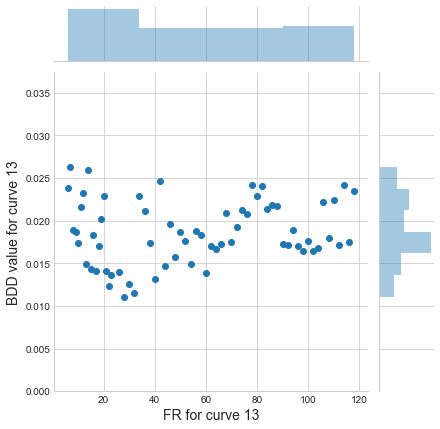

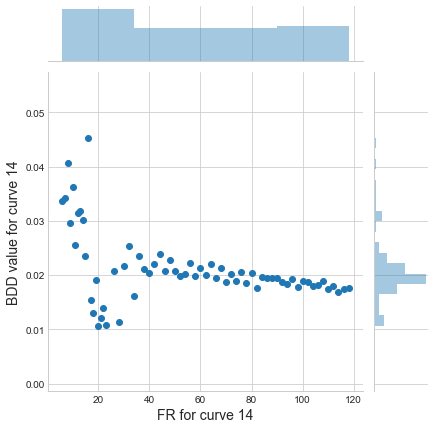

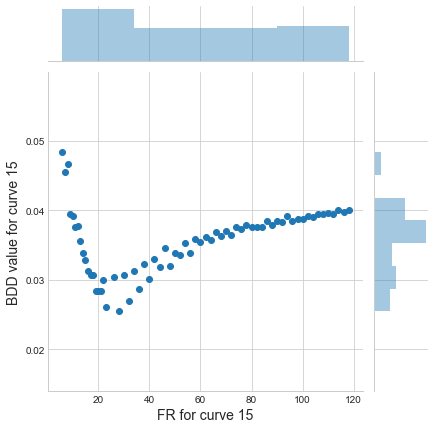

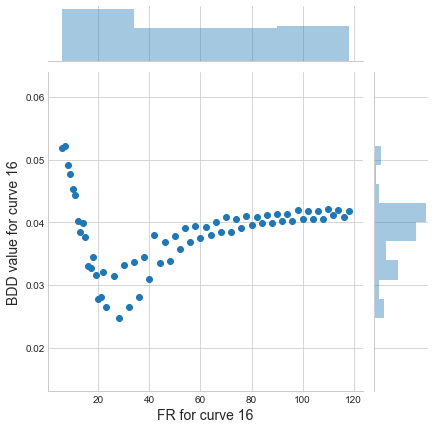

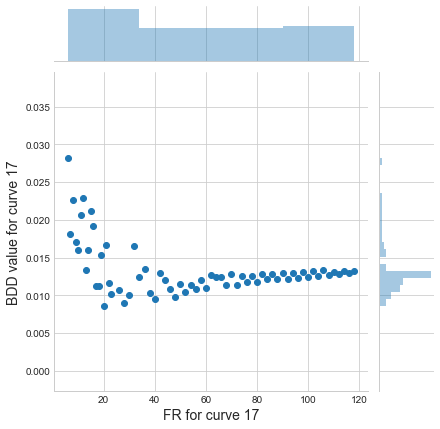

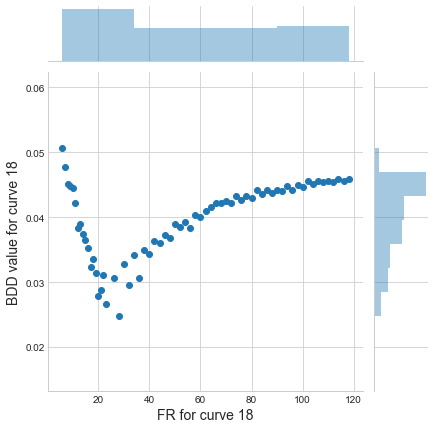

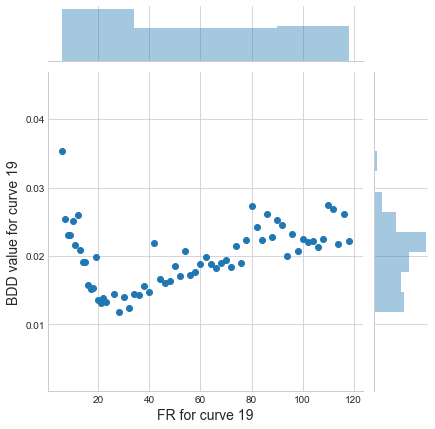

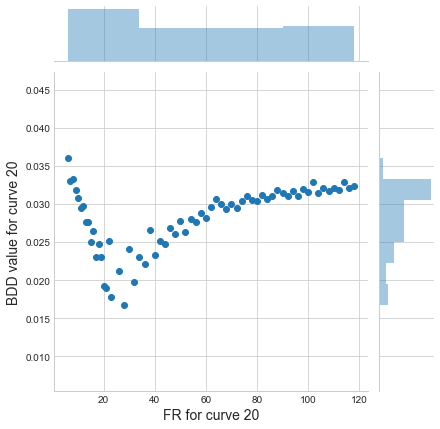

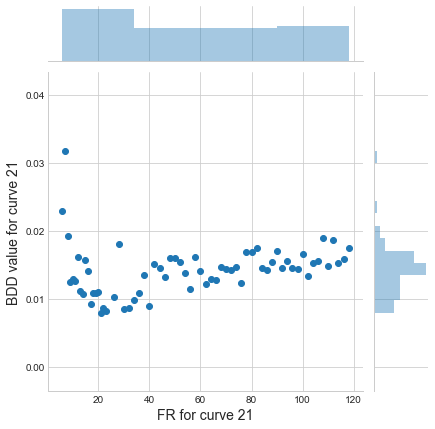

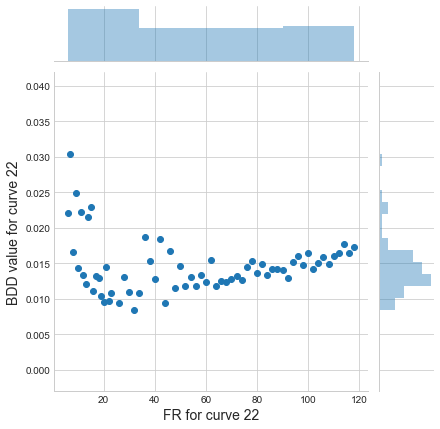

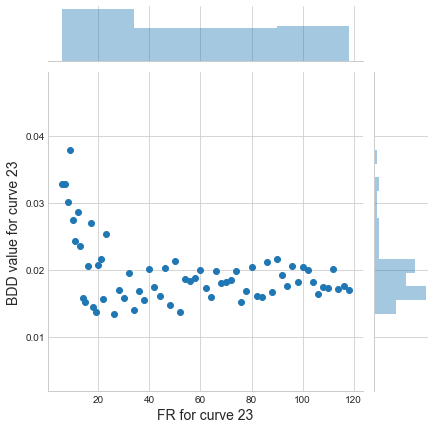

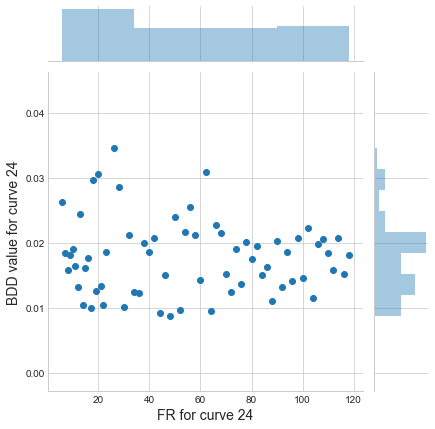

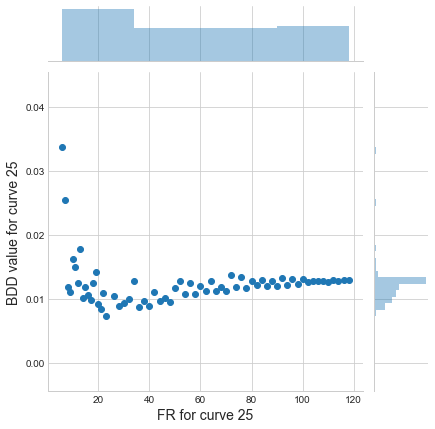

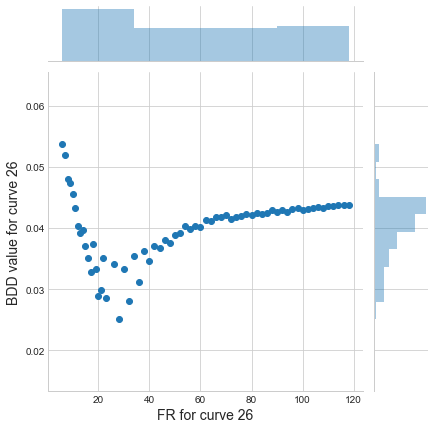

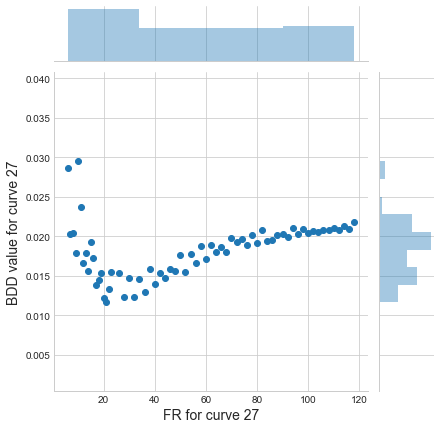

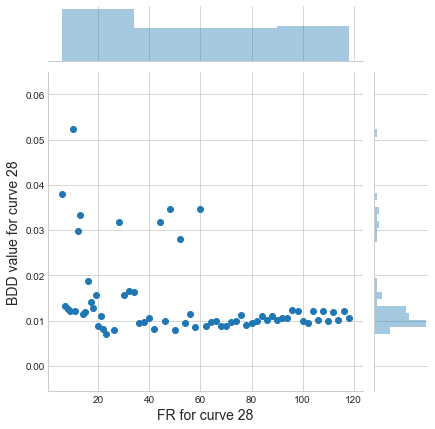

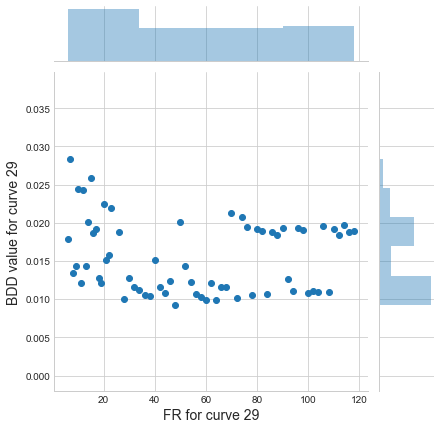

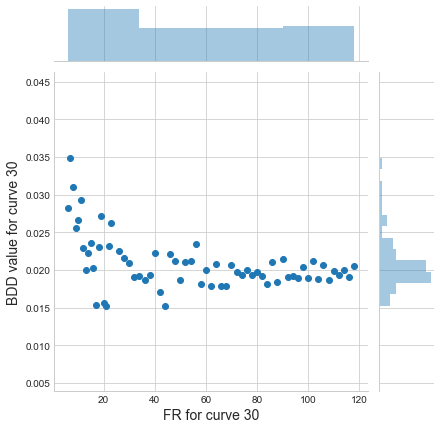

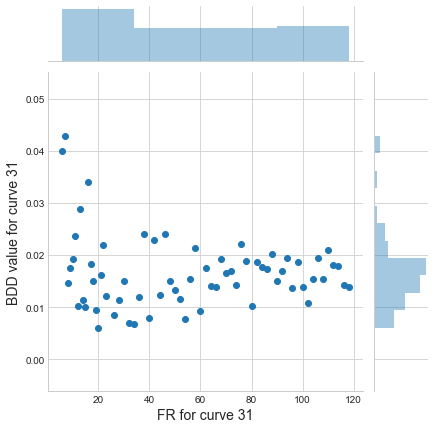

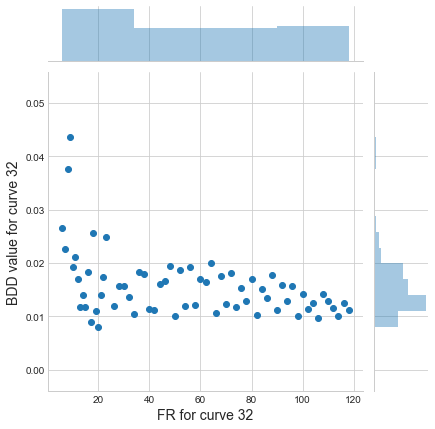

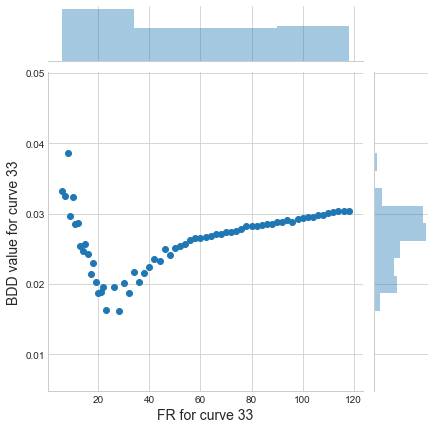

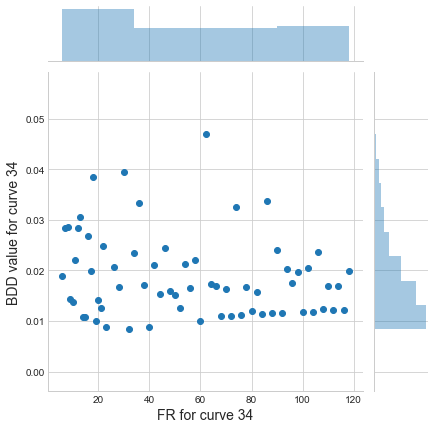

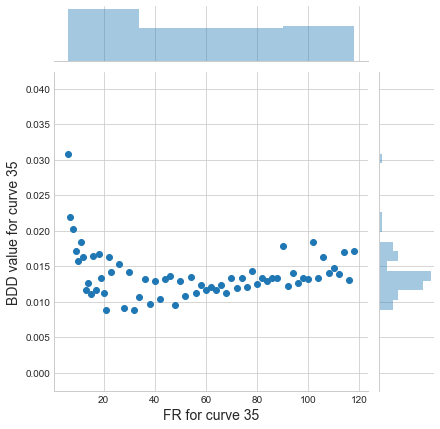

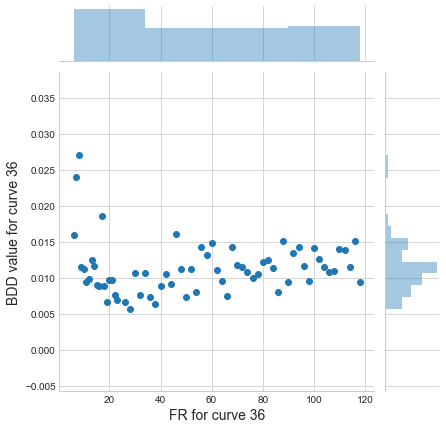

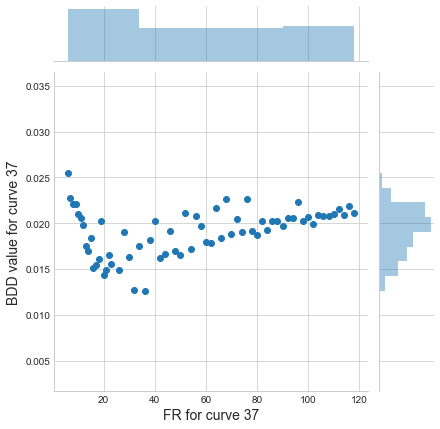

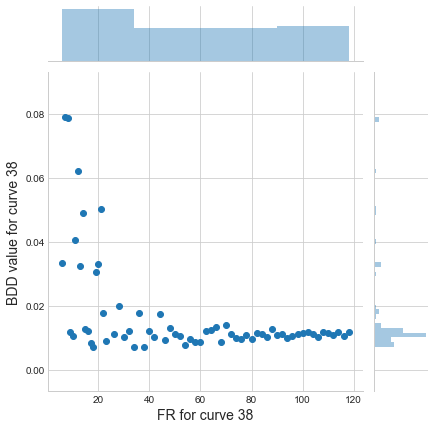

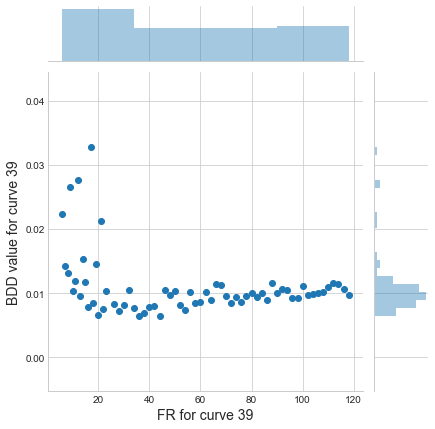

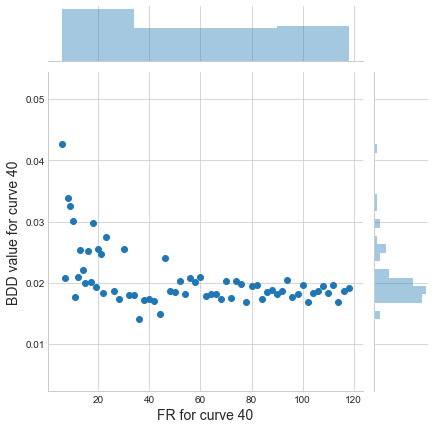

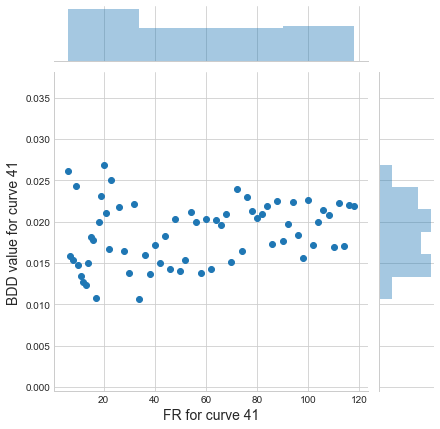

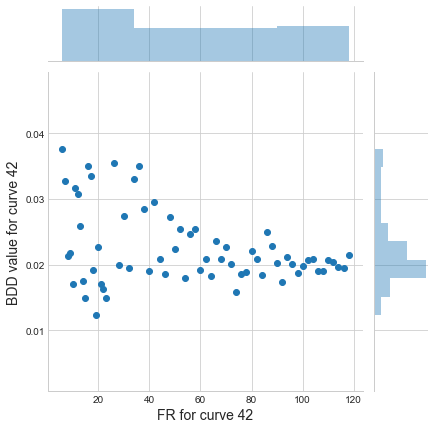

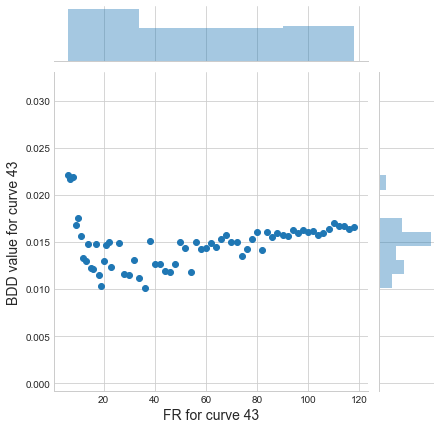

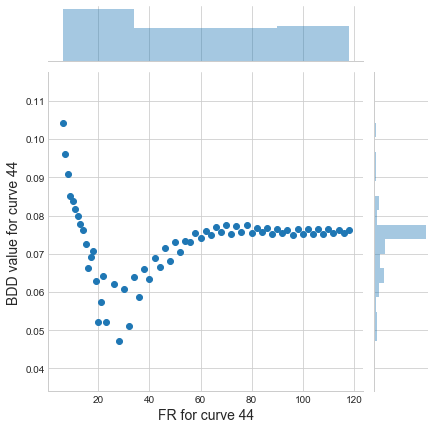

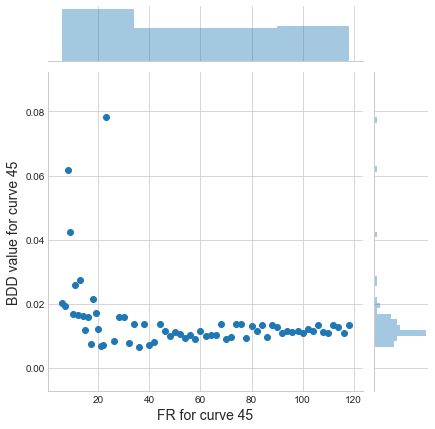

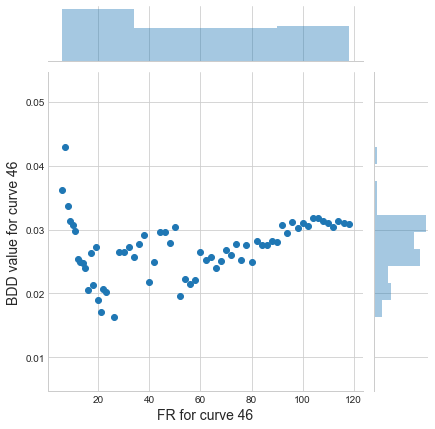

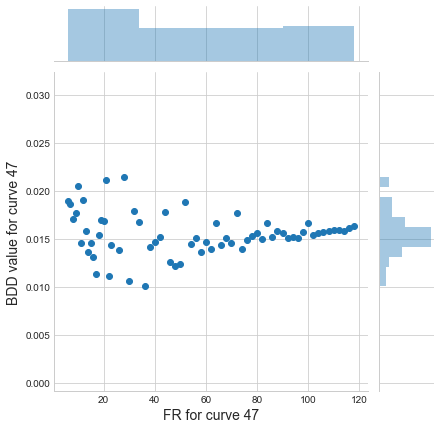

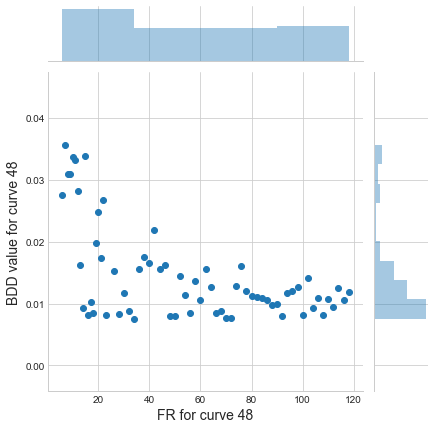

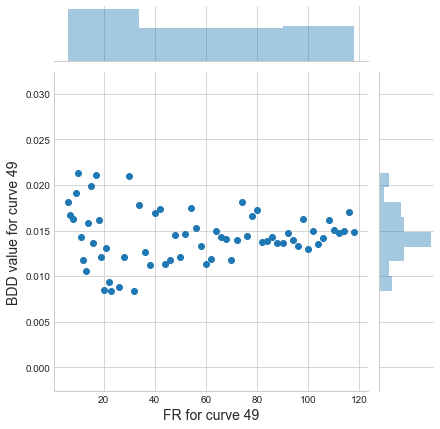

In [10]:
plotBDDforVarSep("FR", 24)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
from sklearn.metrics import mean_squared_error 

In [13]:
#REGRESSION FOR FR < 24

r_values = np.zeros(50)
mse_values = np.zeros(50)

def fitExpRegression(curve):
    data = FR_test_low[FR_test_low.curve_no == curve]
    data = data[data.FR != 24]
    FR = np.array(data['FR']) #x-axis
    BDD = data['Value'] #y-axis

    def f(x):
    # return math.sqrt(x)
       return float(x)

    FR = np.array([f(xi) for xi in FR])
    BDD = np.array([f(xi) for xi in BDD])

    log_of_BDD = np.log(BDD) #log-y-axis
    curve_fit = np.polyfit(FR, log_of_BDD, 1)

#1. Linear transformation curve
    plt.plot(FR, curve_fit[0]*FR + curve_fit[1], label = 'predicted values')
    plt.plot(FR, log_of_BDD, "o", label = 'actual values')
    plt.title("FR vs log(BDD) for curve no." + str(curve))
    plt.xlabel('FR')
    plt.ylabel('log(BDD)')
    plt.legend()
    plt.show()

#equation fo the line: log(BDD) = curve_fit[0] * FR + curve_fit[1]

    log_of_BDD_pred = curve_fit[0] * FR + curve_fit[1]
    print('Equation of the line of best fit for curve no. '+str(curve)+': '+'log_of_BDD_pred = '+str(curve_fit[0])+ '*FR '+'+ '+str(curve_fit[1]))

#correlation coef (Pearson's r):
    r_matrix = np.corrcoef(FR, log_of_BDD)
    r = r_matrix[0, 1]
    print('The correlation coeffcient for FR and log(BDD) is equal to r =' + str(r))
    r_values[curve] = r

#mean-squared-error
    mse = mean_squared_error(log_of_BDD, log_of_BDD_pred) 
    print('The Mean-Squared Error is equal to ' + str(mse))
    mse_values[curve]=mse

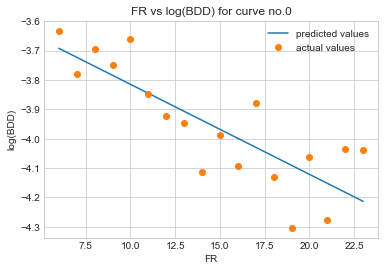

Equation of the line of best fit for curve no. 0: log_of_BDD_pred = -0.030635776981409384*FR + -3.508496305401329
The correlation coeffcient for FR and log(BDD) is equal to r =-0.818155825023876
The Mean-Squared Error is equal to 0.01247778553807094


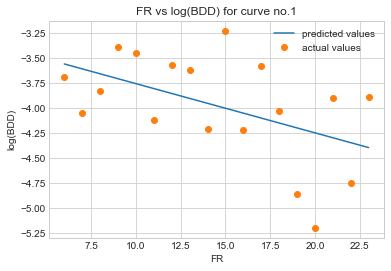

Equation of the line of best fit for curve no. 1: log_of_BDD_pred = -0.049203322349962435*FR + -3.2655086971411977
The correlation coeffcient for FR and log(BDD) is equal to r =-0.4950241808433059
The Mean-Squared Error is equal to 0.20075949996628278


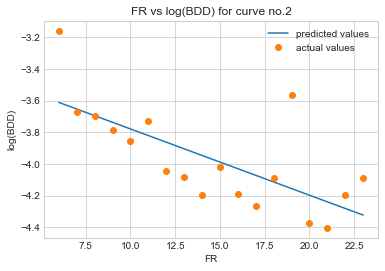

Equation of the line of best fit for curve no. 2: log_of_BDD_pred = -0.04188747008000365*FR + -3.3603480118237217
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7009181062790985
The Mean-Squared Error is equal to 0.0489022121920693


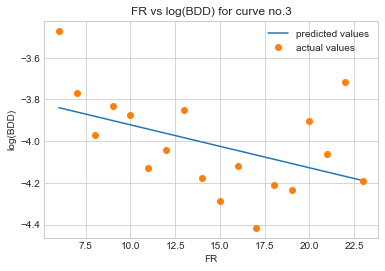

Equation of the line of best fit for curve no. 3: log_of_BDD_pred = -0.020583248096837578*FR + -3.7158464230673864
The correlation coeffcient for FR and log(BDD) is equal to r =-0.46570670732680425
The Mean-Squared Error is equal to 0.04117664001050385


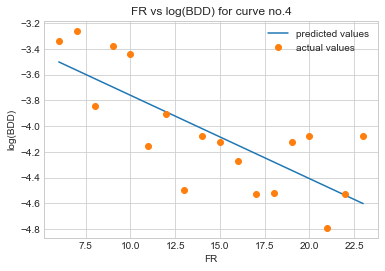

Equation of the line of best fit for curve no. 4: log_of_BDD_pred = -0.06474290466015488*FR + -3.1133371003479096
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7606446418656458
The Mean-Squared Error is equal to 0.08217824811708876


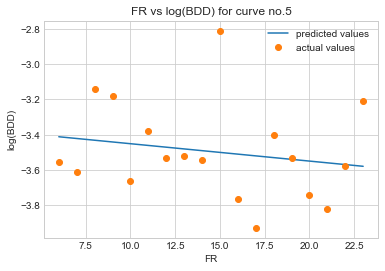

Equation of the line of best fit for curve no. 5: log_of_BDD_pred = -0.009850146995391322*FR + -3.3525723707457127
The correlation coeffcient for FR and log(BDD) is equal to r =-0.19117027279041812
The Mean-Squared Error is equal to 0.06884888810458573


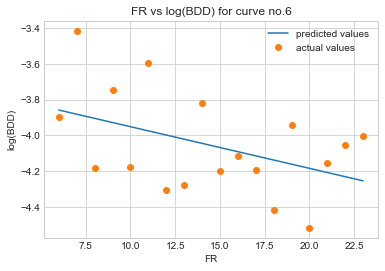

Equation of the line of best fit for curve no. 6: log_of_BDD_pred = -0.023298947578596654*FR + -3.718170285332177
The correlation coeffcient for FR and log(BDD) is equal to r =-0.44016901989874346
The Mean-Squared Error is equal to 0.06080304536279857


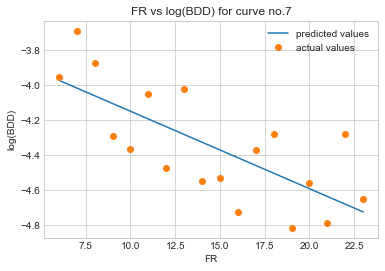

Equation of the line of best fit for curve no. 7: log_of_BDD_pred = -0.044328048456528484*FR + -3.70601374553997
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7238728220826794
The Mean-Squared Error is equal to 0.048047227753056386


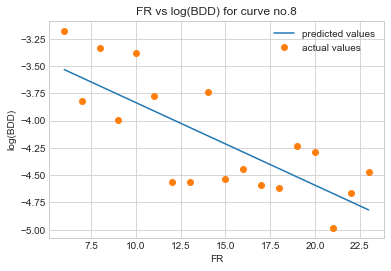

Equation of the line of best fit for curve no. 8: log_of_BDD_pred = -0.07566085534340934*FR + -3.0784966422232394
The correlation coeffcient for FR and log(BDD) is equal to r =-0.766772222941835
The Mean-Squared Error is equal to 0.10799206898322682


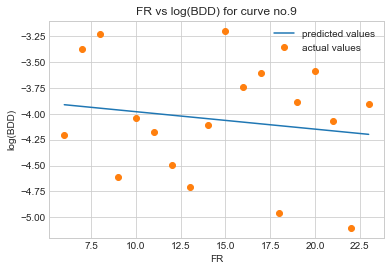

Equation of the line of best fit for curve no. 9: log_of_BDD_pred = -0.016823518421024752*FR + -3.812285783978944
The correlation coeffcient for FR and log(BDD) is equal to r =-0.1603390750896081
The Mean-Squared Error is equal to 0.28871213934224627


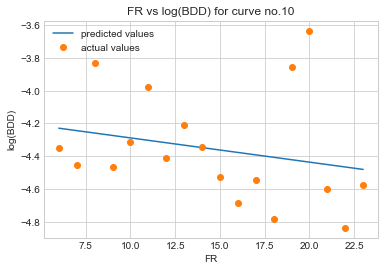

Equation of the line of best fit for curve no. 10: log_of_BDD_pred = -0.014806385505916073*FR + -4.140164898533511
The correlation coeffcient for FR and log(BDD) is equal to r =-0.23456033907567458
The Mean-Squared Error is equal to 0.10135227517838717


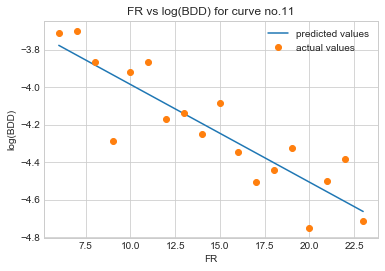

Equation of the line of best fit for curve no. 11: log_of_BDD_pred = -0.05214198292873203*FR + -3.4645050980452434
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8803945265074961
The Mean-Squared Error is equal to 0.021234484772684834


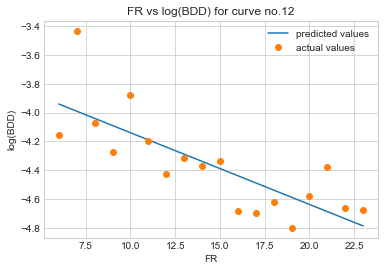

Equation of the line of best fit for curve no. 12: log_of_BDD_pred = -0.04967933747435501*FR + -3.6422828511521383
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7786179910905737
The Mean-Squared Error is equal to 0.043146840893920874


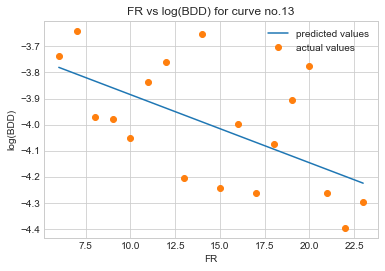

Equation of the line of best fit for curve no. 13: log_of_BDD_pred = -0.02616021424258468*FR + -3.623427859587197
The correlation coeffcient for FR and log(BDD) is equal to r =-0.5876964937244613
The Mean-Squared Error is equal to 0.03491259926446937


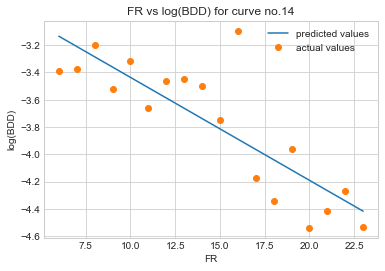

Equation of the line of best fit for curve no. 14: log_of_BDD_pred = -0.07540066169245699*FR + -2.6823656359037535
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8308900034531241
The Mean-Squared Error is equal to 0.06863032519855622


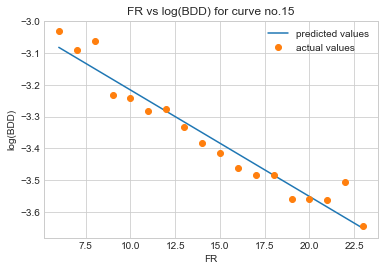

Equation of the line of best fit for curve no. 15: log_of_BDD_pred = -0.03355233705218476*FR + -2.880835202456766
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9691261959776026
The Mean-Squared Error is equal to 0.0019614166383568016


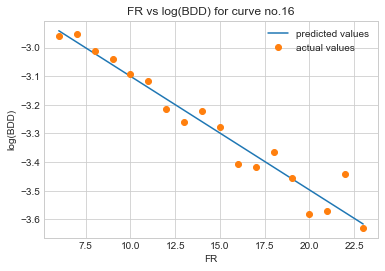

Equation of the line of best fit for curve no. 16: log_of_BDD_pred = -0.03973394507031497*FR + -2.702604384458414
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9729699837224848
The Mean-Squared Error is equal to 0.002393936083455276


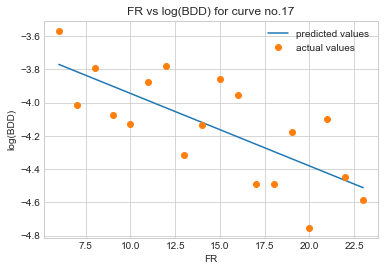

Equation of the line of best fit for curve no. 17: log_of_BDD_pred = -0.0436087188801443*FR + -3.5088059588436837
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7283728892326413
The Mean-Squared Error is equal to 0.04529715724809336


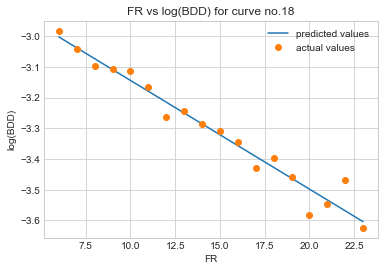

Equation of the line of best fit for curve no. 18: log_of_BDD_pred = -0.03542955836733676*FR + -2.789566815355403
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9799358875797466
The Mean-Squared Error is equal to 0.0013977468055199832


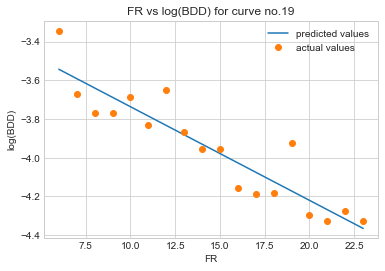

Equation of the line of best fit for curve no. 19: log_of_BDD_pred = -0.048354345639021606*FR + -3.2528102562217653
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9162085325177978
The Mean-Squared Error is equal to 0.012037774388649768


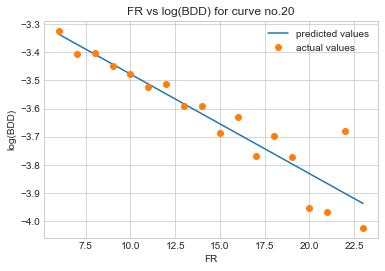

Equation of the line of best fit for curve no. 20: log_of_BDD_pred = -0.03537021803800441*FR + -3.1239908941166026
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9290797000287584
The Mean-Squared Error is equal to 0.005337176228099201


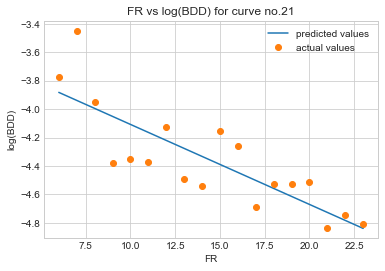

Equation of the line of best fit for curve no. 21: log_of_BDD_pred = -0.056238478046317986*FR + -3.544990476112319
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8221374331064251
The Mean-Squared Error is equal to 0.040819270115559934


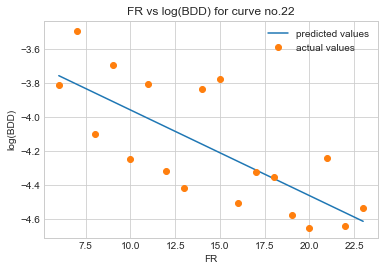

Equation of the line of best fit for curve no. 22: log_of_BDD_pred = -0.05038836766944888*FR + -3.4539923540713793
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7428884099239089
The Mean-Squared Error is equal to 0.055491431197953654


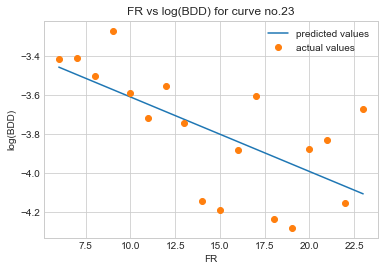

Equation of the line of best fit for curve no. 23: log_of_BDD_pred = -0.038153105085815014*FR + -3.2287827849241704
The correlation coeffcient for FR and log(BDD) is equal to r =-0.6528608420646979
The Mean-Squared Error is equal to 0.052744807134536026


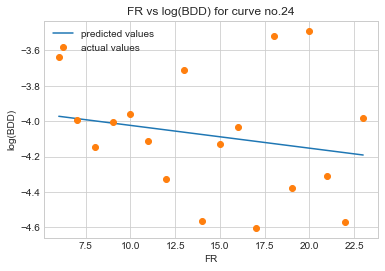

Equation of the line of best fit for curve no. 24: log_of_BDD_pred = -0.012877382394733886*FR + -3.8945681012780486
The correlation coeffcient for FR and log(BDD) is equal to r =-0.20057782940343247
The Mean-Squared Error is equal to 0.10648222420775201


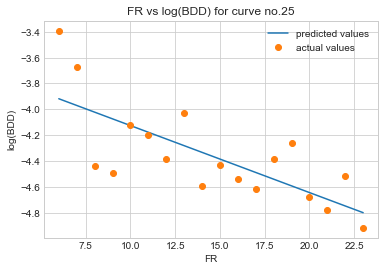

Equation of the line of best fit for curve no. 25: log_of_BDD_pred = -0.05188279507891147*FR + -3.6066766415442184
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7337512449700154
The Mean-Squared Error is equal to 0.06212189213627376


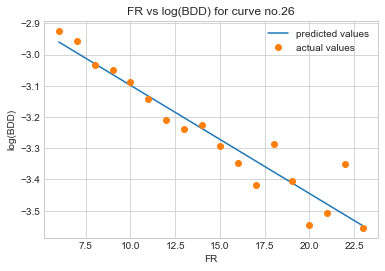

Equation of the line of best fit for curve no. 26: log_of_BDD_pred = -0.03466096247291574*FR + -2.751837101145348
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9521693749189362
The Mean-Squared Error is equal to 0.003330409575873955


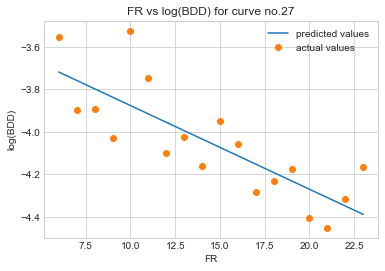

Equation of the line of best fit for curve no. 27: log_of_BDD_pred = -0.03946467958808335*FR + -3.4811496296282614
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8032199855239467
The Mean-Squared Error is equal to 0.023056805020262236


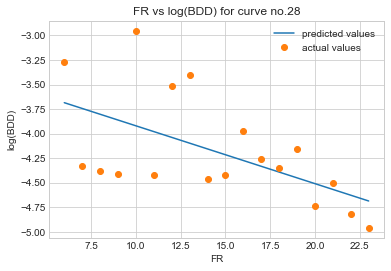

Equation of the line of best fit for curve no. 28: log_of_BDD_pred = -0.058934735589162957*FR + -3.33155651415678
The correlation coeffcient for FR and log(BDD) is equal to r =-0.5678479195229914
The Mean-Squared Error is equal to 0.19644474665494652


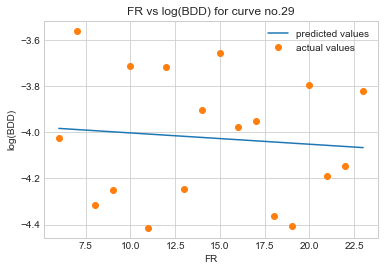

Equation of the line of best fit for curve no. 29: log_of_BDD_pred = -0.004890187911529719*FR + -3.9543483936555655
The correlation coeffcient for FR and log(BDD) is equal to r =-0.09460509621416058
The Mean-Squared Error is equal to 0.07127526156345493


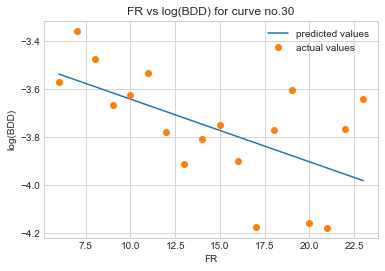

Equation of the line of best fit for curve no. 30: log_of_BDD_pred = -0.026181842592805885*FR + -3.3790314314944725
The correlation coeffcient for FR and log(BDD) is equal to r =-0.5900928463902501
The Mean-Squared Error is equal to 0.03453734692841951


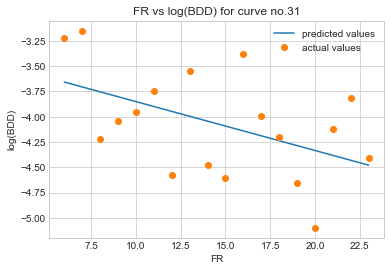

Equation of the line of best fit for curve no. 31: log_of_BDD_pred = -0.048320842480279645*FR + -3.3677263379495335
The correlation coeffcient for FR and log(BDD) is equal to r =-0.48584196284243064
The Mean-Squared Error is equal to 0.20340867675946003


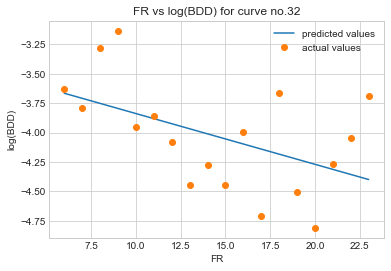

Equation of the line of best fit for curve no. 32: log_of_BDD_pred = -0.04317323039743324*FR + -3.405923409455887
The correlation coeffcient for FR and log(BDD) is equal to r =-0.4986763131260626
The Mean-Squared Error is equal to 0.15157897141680707


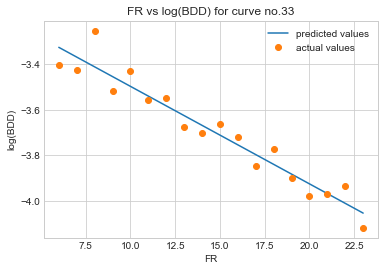

Equation of the line of best fit for curve no. 33: log_of_BDD_pred = -0.04275455723917505*FR + -3.069532832564521
The correlation coeffcient for FR and log(BDD) is equal to r =-0.961728981488345
The Mean-Squared Error is equal to 0.003993831372261429


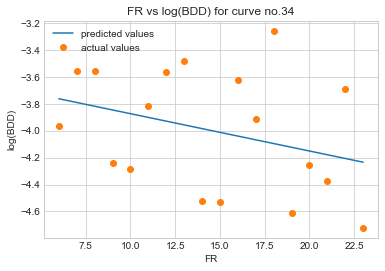

Equation of the line of best fit for curve no. 34: log_of_BDD_pred = -0.0276930206475567*FR + -3.5973827239683773
The correlation coeffcient for FR and log(BDD) is equal to r =-0.326909051128243
The Mean-Squared Error is equal to 0.17251344673897961


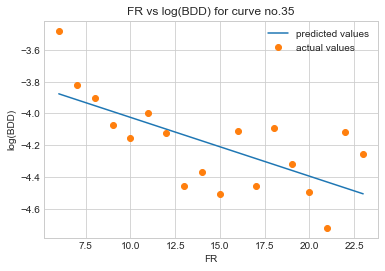

Equation of the line of best fit for curve no. 35: log_of_BDD_pred = -0.03706101789663502*FR + -3.6540434140643803
The correlation coeffcient for FR and log(BDD) is equal to r =-0.6705663515034158
The Mean-Squared Error is equal to 0.04524849453205324


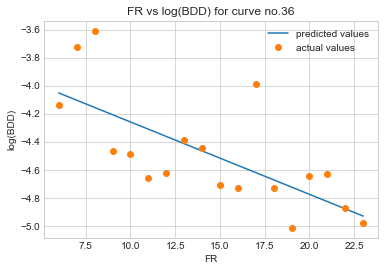

Equation of the line of best fit for curve no. 36: log_of_BDD_pred = -0.051652815947771054*FR + -3.742734059036699
The correlation coeffcient for FR and log(BDD) is equal to r =-0.6971308617944203
The Mean-Squared Error is equal to 0.07595406402233028


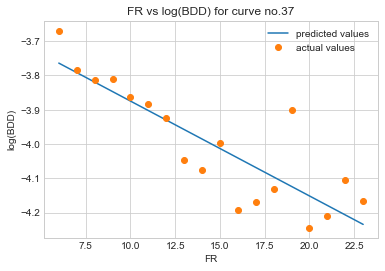

Equation of the line of best fit for curve no. 37: log_of_BDD_pred = -0.02768456351633721*FR + -3.597765125130097
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8558026977714146
The Mean-Squared Error is equal to 0.007537689997731174


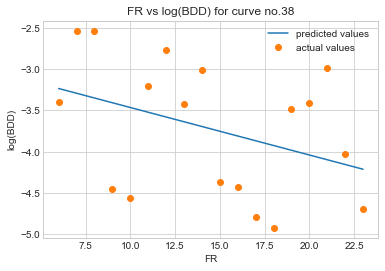

Equation of the line of best fit for curve no. 38: log_of_BDD_pred = -0.05746455056213087*FR + -2.890464312080823
The correlation coeffcient for FR and log(BDD) is equal to r =-0.37894368525169353
The Mean-Squared Error is equal to 0.5300898256974016


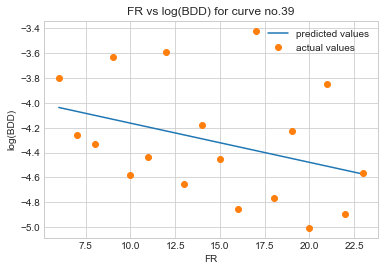

Equation of the line of best fit for curve no. 39: log_of_BDD_pred = -0.03154481291190117*FR + -3.8479252356729834
The correlation coeffcient for FR and log(BDD) is equal to r =-0.35168407194117196
The Mean-Squared Error is equal to 0.18977267425661729


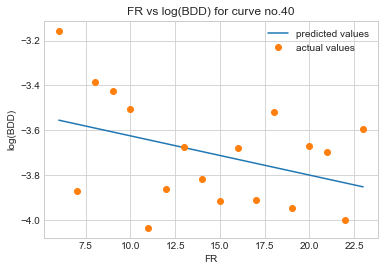

Equation of the line of best fit for curve no. 40: log_of_BDD_pred = -0.01750601488947766*FR + -3.45018184606145
The correlation coeffcient for FR and log(BDD) is equal to r =-0.3888462373847749
The Mean-Squared Error is equal to 0.04630679440352328


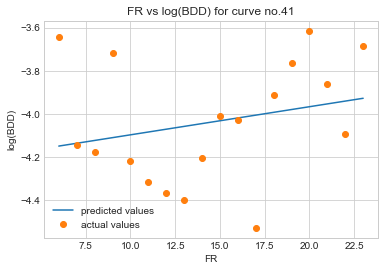

Equation of the line of best fit for curve no. 41: log_of_BDD_pred = 0.013009406730571776*FR + -4.226449685002056
The correlation coeffcient for FR and log(BDD) is equal to r =0.2482349479416631
The Mean-Squared Error is equal to 0.06937274545874111


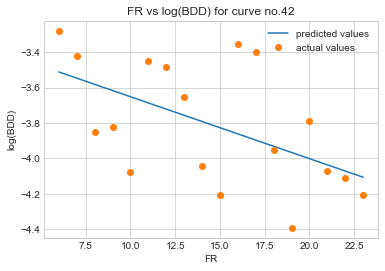

Equation of the line of best fit for curve no. 42: log_of_BDD_pred = -0.03502328410384202*FR + -3.3012121080881274
The correlation coeffcient for FR and log(BDD) is equal to r =-0.5394001663818501
The Mean-Squared Error is equal to 0.08046150733318988


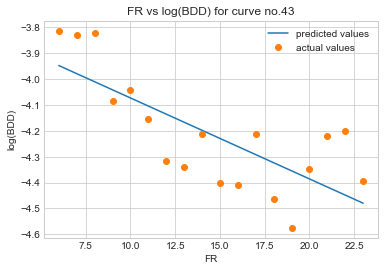

Equation of the line of best fit for curve no. 43: log_of_BDD_pred = -0.03129653544019316*FR + -3.7597531315763137
The correlation coeffcient for FR and log(BDD) is equal to r =-0.7447532863291682
The Mean-Squared Error is equal to 0.02116816103139506


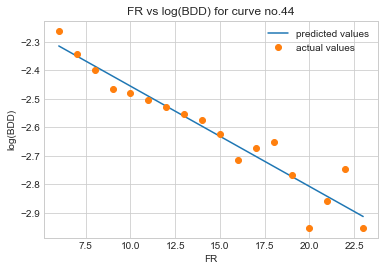

Equation of the line of best fit for curve no. 44: log_of_BDD_pred = -0.035203956563699394*FR + -2.1028439448271605
The correlation coeffcient for FR and log(BDD) is equal to r =-0.9550804902093223
The Mean-Squared Error is equal to 0.0032116183595390447


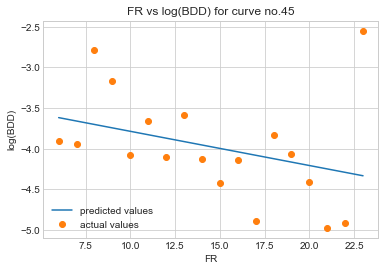

Equation of the line of best fit for curve no. 45: log_of_BDD_pred = -0.042104725215190736*FR + -3.3646616746428926
The correlation coeffcient for FR and log(BDD) is equal to r =-0.33620325042480104
The Mean-Squared Error is equal to 0.3744439178070261


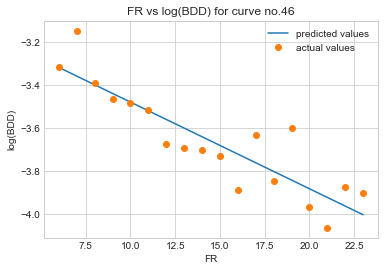

Equation of the line of best fit for curve no. 46: log_of_BDD_pred = -0.04027682026577849*FR + -3.0765779584855157
The correlation coeffcient for FR and log(BDD) is equal to r =-0.8831337620566835
The Mean-Squared Error is equal to 0.012321083127576581


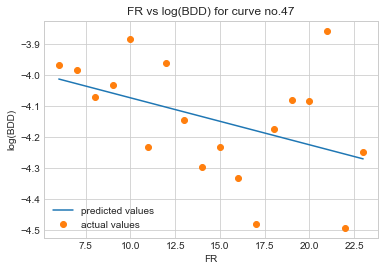

Equation of the line of best fit for curve no. 47: log_of_BDD_pred = -0.015127017056546205*FR + -3.921588095872851
The correlation coeffcient for FR and log(BDD) is equal to r =-0.4352552608337926
The Mean-Squared Error is equal to 0.026352459391865136


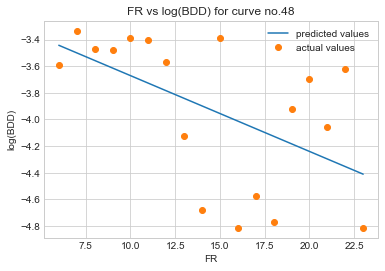

Equation of the line of best fit for curve no. 48: log_of_BDD_pred = -0.056922188587196346*FR + -3.1013102137802635
The correlation coeffcient for FR and log(BDD) is equal to r =-0.5432166138172781
The Mean-Squared Error is equal to 0.2083413901820861


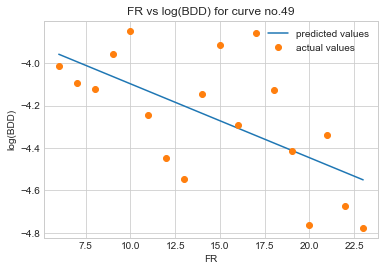

Equation of the line of best fit for curve no. 49: log_of_BDD_pred = -0.03487398137031381*FR + -3.748506748807682
The correlation coeffcient for FR and log(BDD) is equal to r =-0.6225005277984093
The Mean-Squared Error is equal to 0.051742342482942044
[-0.81815583 -0.49502418 -0.70091811 -0.46570671 -0.76064464 -0.19117027
 -0.44016902 -0.72387282 -0.76677222 -0.16033908 -0.23456034 -0.88039453
 -0.77861799 -0.58769649 -0.83089    -0.9691262  -0.97296998 -0.72837289
 -0.97993589 -0.91620853 -0.9290797  -0.82213743 -0.74288841 -0.65286084
 -0.20057783 -0.73375124 -0.95216937 -0.80321999 -0.56784792 -0.0946051
 -0.59009285 -0.48584196 -0.49867631 -0.96172898 -0.32690905 -0.67056635
 -0.69713086 -0.8558027  -0.37894369 -0.35168407 -0.38884624  0.24823495
 -0.53940017 -0.74475329 -0.95508049 -0.33620325 -0.88313376 -0.43525526
 -0.54321661 -0.62250053]
[0.01247779 0.2007595  0.04890221 0.04117664 0.08217825 0.06884889
 0.06080305 0.04804723 0.10799207 0.28871214 0.10135228 0.02123448
 0.04

In [14]:
for i in range(50):
    fitExpRegression(i)
    
print(r_values)
print(mse_values)

#Question: How to obtain a single linear regression models from the 50 models we generated?
#Run stats for coefficients (slope m, c) too!

(0.0, 20.0)

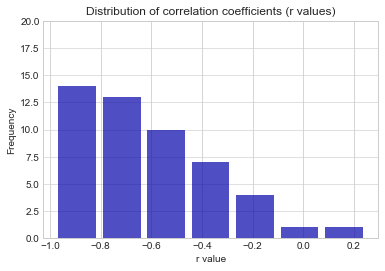

In [17]:
# Plot a histogram for correlation coefficients for 50 curves
n, bins, patches = plt.hist(x= r_values, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('r value')
plt.ylabel('Frequency')
plt.title('Distribution of correlation coefficients (r values) for 50 curves')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

(0.0, 20.0)

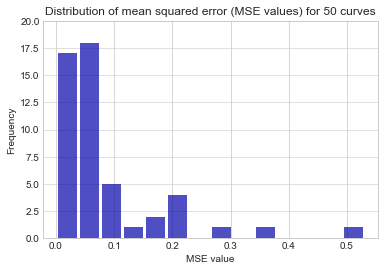

In [18]:
# Plot a histogram for mean squared error values for 50 curves
n, bins, patches = plt.hist(x= mse_values, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('MSE value')
plt.ylabel('Frequency')
plt.title('Distribution of mean squared error (MSE values) for 50 curves')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [24]:
#REGRESSION FOR FR > 24

r_values_log = np.zeros(50)
mse_values_log = np.zeros(50)

def fitLogRegression(curve):
    data = FR_test_high[FR_test_high.curve_no == curve]
    data = data[data.FR != 24]
    FR = np.array(data['FR']) #x-axis
    BDD = data['Value'] #y-axis

    def f(x):
    # return math.sqrt(x)
       return float(x)

    FR = np.array([f(xi) for xi in FR])
    BDD = np.array([f(xi) for xi in BDD])

    exp_of_BDD = np.exp(BDD) #log-y-axis
    curve_fit = np.polyfit(FR, exp_of_BDD, 1)

#1. Linear transformation curve
    plt.plot(FR, curve_fit[0]*FR + curve_fit[1], label = 'predicted values')
    plt.plot(FR, exp_of_BDD, "o", label = 'actual values')
    plt.title("FR vs exp(BDD) for curve no." + str(curve))
    plt.xlabel('FR')
    plt.ylabel('exp(BDD)')
    plt.legend()
    plt.show()

#equation fo the line: log(BDD) = curve_fit[0] * FR + curve_fit[1]

    exp_of_BDD_pred = curve_fit[0] * FR + curve_fit[1]
    print('Equation of the line of best fit for curve no. '+str(curve)+': '+'exp_of_BDD_pred = '+str(curve_fit[0])+ '*FR '+'+ '+str(curve_fit[1]))

#correlation coef (Pearson's r):
    r_matrix = np.corrcoef(FR, exp_of_BDD)
    r = r_matrix[0, 1]
    print('The correlation coeffcient for FR and exp(BDD) is equal to r =' + str(r))
    r_values_log[curve] = r

#mean-squared-error
    mse = mean_squared_error(exp_of_BDD, exp_of_BDD_pred) 
    print('The Mean-Squared Error is equal to ' + str(mse))
    mse_values_log[curve]=mse

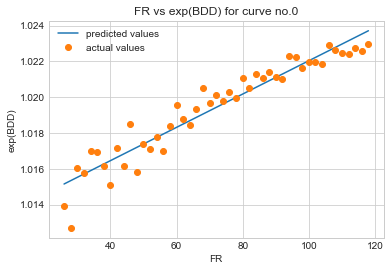

Equation of the line of best fit for curve no. 0: exp_of_BDD_pred = 9.310950849328633e-05*FR + 1.0127251013358134
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9540323389776518
The Mean-Squared Error is equal to 6.296857177710182e-07


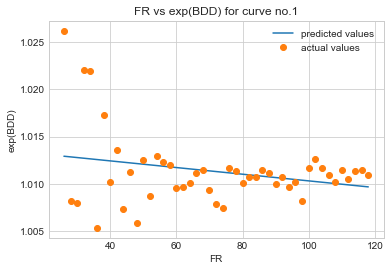

Equation of the line of best fit for curve no. 1: exp_of_BDD_pred = -3.518247909403105e-05*FR + 1.0138341795122348
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.25413874366081
The Mean-Squared Error is equal to 1.3194488730189314e-05


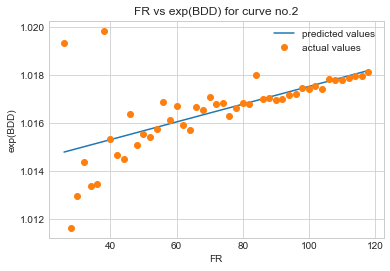

Equation of the line of best fit for curve no. 2: exp_of_BDD_pred = 3.699185348442337e-05*FR + 1.0138191925026765
The correlation coeffcient for FR and exp(BDD) is equal to r =0.6374126781913605
The Mean-Squared Error is equal to 1.4717002626749029e-06


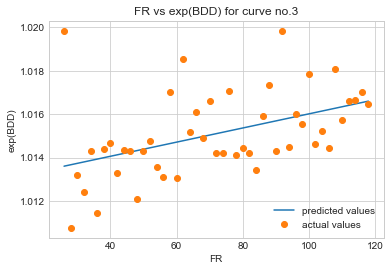

Equation of the line of best fit for curve no. 3: exp_of_BDD_pred = 3.2552588392743324e-05*FR + 1.0127607198931508
The correlation coeffcient for FR and exp(BDD) is equal to r =0.453243017417783
The Mean-Squared Error is equal to 3.0166102802229718e-06


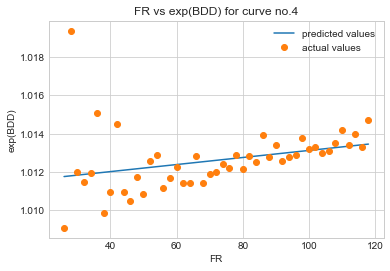

Equation of the line of best fit for curve no. 4: exp_of_BDD_pred = 1.839200198106441e-05*FR + 1.0112879749147323
The correlation coeffcient for FR and exp(BDD) is equal to r =0.31706277310931547
The Mean-Squared Error is equal to 2.227576246616056e-06


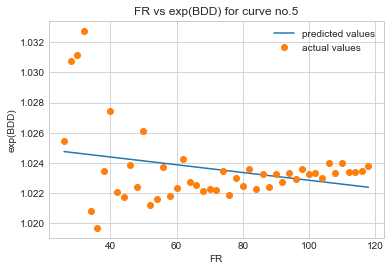

Equation of the line of best fit for curve no. 5: exp_of_BDD_pred = -2.5654277041663616e-05*FR + 1.0254188658992667
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.2854387562501579
The Mean-Squared Error is equal to 5.46087633290513e-06


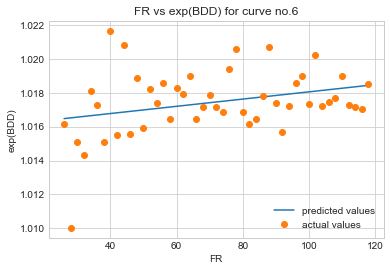

Equation of the line of best fit for curve no. 6: exp_of_BDD_pred = 2.1302246614386675e-05*FR + 1.0159210158964849
The correlation coeffcient for FR and exp(BDD) is equal to r =0.3020247842219866
The Mean-Squared Error is equal to 3.3273824225166855e-06


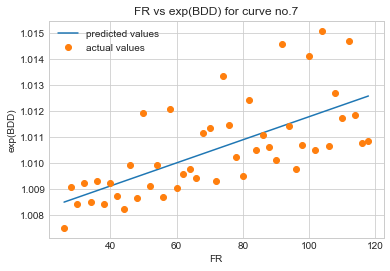

Equation of the line of best fit for curve no. 7: exp_of_BDD_pred = 4.443583585021071e-05*FR + 1.0073349255110315
The correlation coeffcient for FR and exp(BDD) is equal to r =0.6735786188295445
The Mean-Squared Error is equal to 1.7498170851417798e-06


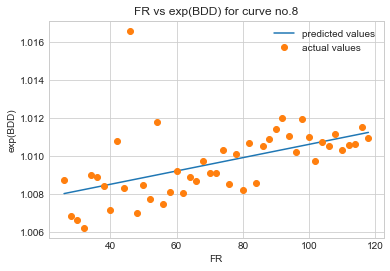

Equation of the line of best fit for curve no. 8: exp_of_BDD_pred = 3.501346364109258e-05*FR + 1.007131471390727
The correlation coeffcient for FR and exp(BDD) is equal to r =0.5205636726691215
The Mean-Squared Error is equal to 2.427368974206019e-06


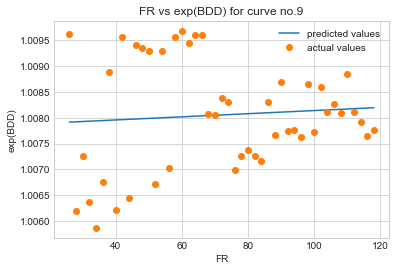

Equation of the line of best fit for curve no. 9: exp_of_BDD_pred = 3.0201728906687334e-06*FR + 1.0078355696741488
The correlation coeffcient for FR and exp(BDD) is equal to r =0.07765831070308563
The Mean-Squared Error is equal to 1.1064670042516997e-06


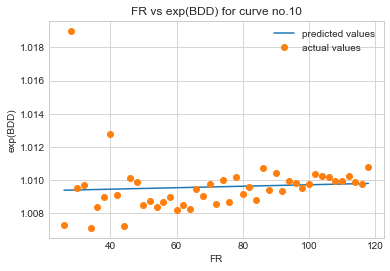

Equation of the line of best fit for curve no. 10: exp_of_BDD_pred = 4.4463237285779354e-06*FR + 1.0092730117503055
The correlation coeffcient for FR and exp(BDD) is equal to r =0.07049828128667558
The Mean-Squared Error is equal to 2.913124775137039e-06


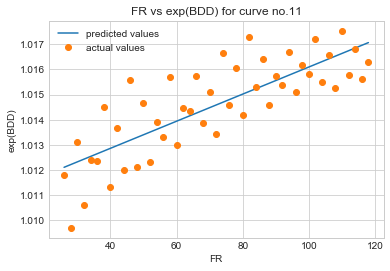

Equation of the line of best fit for curve no. 11: exp_of_BDD_pred = 5.380918587023165e-05*FR + 1.0107114010429359
The correlation coeffcient for FR and exp(BDD) is equal to r =0.7951653250304883
The Mean-Squared Error is equal to 1.2393207409769335e-06


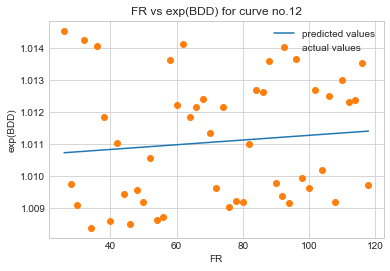

Equation of the line of best fit for curve no. 12: exp_of_BDD_pred = 7.364164784497705e-06*FR + 1.0105419482755906
The correlation coeffcient for FR and exp(BDD) is equal to r =0.10596659999510208
The Mean-Squared Error is equal to 3.514653905658981e-06


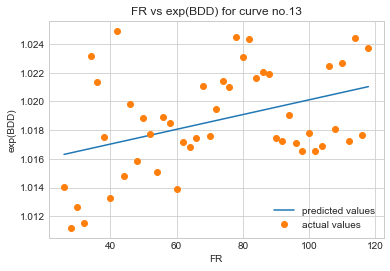

Equation of the line of best fit for curve no. 13: exp_of_BDD_pred = 5.129858396727589e-05*FR + 1.0149758280639027
The correlation coeffcient for FR and exp(BDD) is equal to r =0.39677273374217675
The Mean-Squared Error is equal to 1.0366010428222676e-05


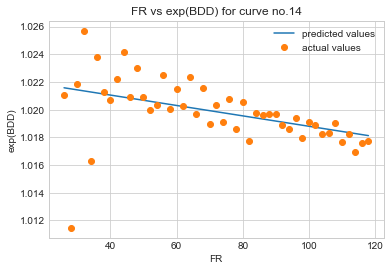

Equation of the line of best fit for curve no. 14: exp_of_BDD_pred = -3.753778599514627e-05*FR + 1.0225577471671865
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.4451297760231129
The Mean-Squared Error is equal to 4.197010916946632e-06


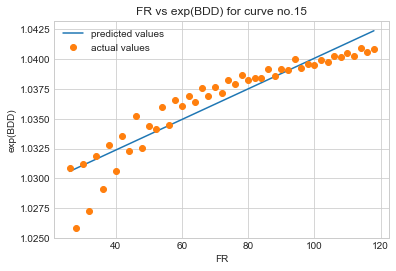

Equation of the line of best fit for curve no. 15: exp_of_BDD_pred = 0.00012817601283114823*FR + 1.0272550719211488
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9243515565858461
The Mean-Squared Error is equal to 2.060162074180575e-06


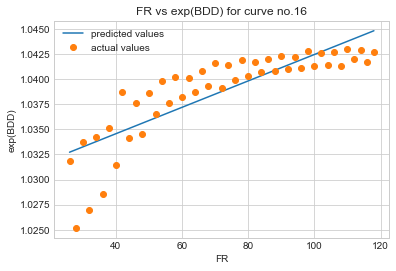

Equation of the line of best fit for curve no. 16: exp_of_BDD_pred = 0.00013160163443324372*FR + 1.0293061684996745
The correlation coeffcient for FR and exp(BDD) is equal to r =0.8272649441721236
The Mean-Squared Error is equal to 5.878860367028641e-06


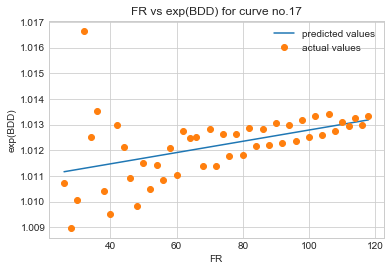

Equation of the line of best fit for curve no. 17: exp_of_BDD_pred = 2.1939354452087586e-05*FR + 1.010592964232031
The correlation coeffcient for FR and exp(BDD) is equal to r =0.46177698618403046
The Mean-Squared Error is equal to 1.307086465512227e-06


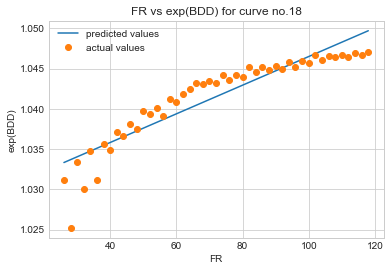

Equation of the line of best fit for curve no. 18: exp_of_BDD_pred = 0.00017787840740876988*FR + 1.028703793775105
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9153010106913011
The Mean-Squared Error is equal to 4.509326287308564e-06


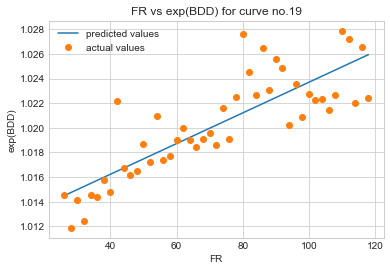

Equation of the line of best fit for curve no. 19: exp_of_BDD_pred = 0.0001245567033554254*FR + 1.011248510332933
The correlation coeffcient for FR and exp(BDD) is equal to r =0.8325696215786972
The Mean-Squared Error is equal to 5.054353878847518e-06


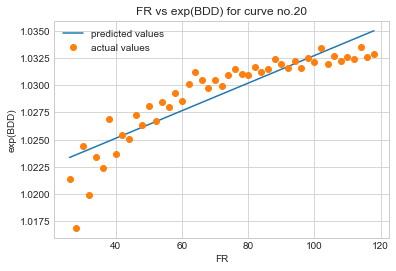

Equation of the line of best fit for curve no. 20: exp_of_BDD_pred = 0.0001265885922556756*FR + 1.0200700321566
The correlation coeffcient for FR and exp(BDD) is equal to r =0.8890731733402683
The Mean-Squared Error is equal to 3.1266359155606835e-06


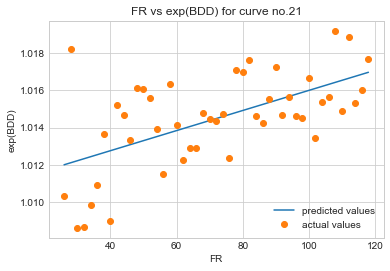

Equation of the line of best fit for curve no. 21: exp_of_BDD_pred = 5.382666299810729e-05*FR + 1.0106119484263723
The correlation coeffcient for FR and exp(BDD) is equal to r =0.5824128105432902
The Mean-Squared Error is equal to 4.15410860396609e-06


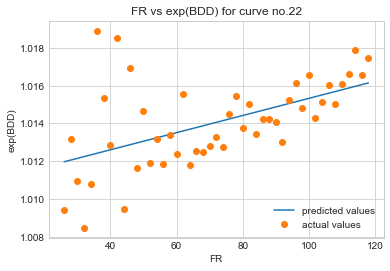

Equation of the line of best fit for curve no. 22: exp_of_BDD_pred = 4.5399612685253914e-05*FR + 1.0107894401565147
The correlation coeffcient for FR and exp(BDD) is equal to r =0.5317650829214973
The Mean-Squared Error is equal to 3.847675499886888e-06


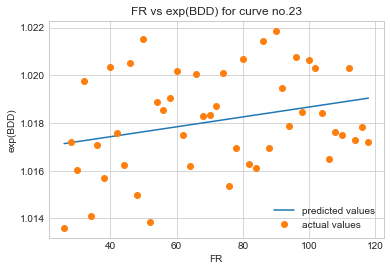

Equation of the line of best fit for curve no. 23: exp_of_BDD_pred = 2.073863935332969e-05*FR + 1.0165953005069779
The correlation coeffcient for FR and exp(BDD) is equal to r =0.27049295168720605
The Mean-Squared Error is equal to 4.009850481922705e-06


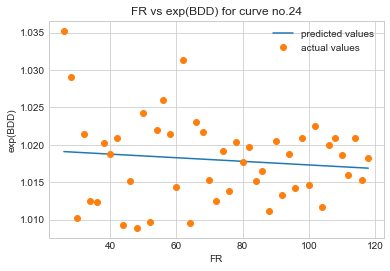

Equation of the line of best fit for curve no. 24: exp_of_BDD_pred = -2.4087915491253297e-05*FR + 1.0197131667251889
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.11486254417567149
The Mean-Squared Error is equal to 3.194121503995794e-05


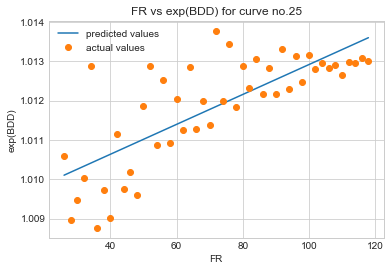

Equation of the line of best fit for curve no. 25: exp_of_BDD_pred = 3.799034966317916e-05*FR + 1.009116932733868
The correlation coeffcient for FR and exp(BDD) is equal to r =0.7600253517166362
The Mean-Squared Error is equal to 7.766986052311671e-07


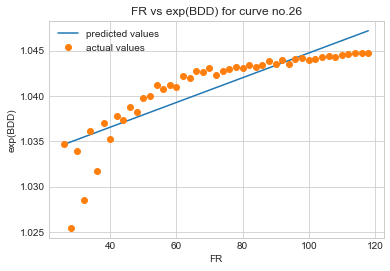

Equation of the line of best fit for curve no. 26: exp_of_BDD_pred = 0.000136356192398509*FR + 1.0311033367342728
The correlation coeffcient for FR and exp(BDD) is equal to r =0.8445448781480932
The Mean-Squared Error is equal to 5.501439510788698e-06


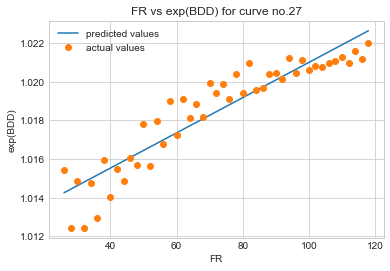

Equation of the line of best fit for curve no. 27: exp_of_BDD_pred = 9.108478127171594e-05*FR + 1.0118893064350831
The correlation coeffcient for FR and exp(BDD) is equal to r =0.9258565122358003
The Mean-Squared Error is equal to 1.0171359882745516e-06


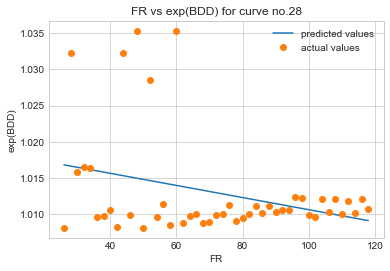

Equation of the line of best fit for curve no. 28: exp_of_BDD_pred = -8.391630744465136e-05*FR + 1.018993200090775
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.31949422312718495
The Mean-Squared Error is equal to 4.5591495135107195e-05


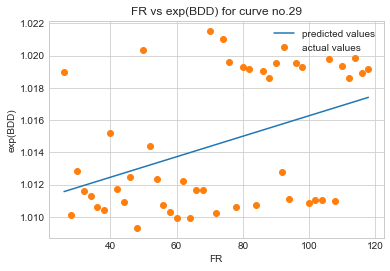

Equation of the line of best fit for curve no. 29: exp_of_BDD_pred = 6.354777695202574e-05*FR + 1.0099125929729147
The correlation coeffcient for FR and exp(BDD) is equal to r =0.4170660342922307
The Mean-Squared Error is equal to 1.4114917495628377e-05


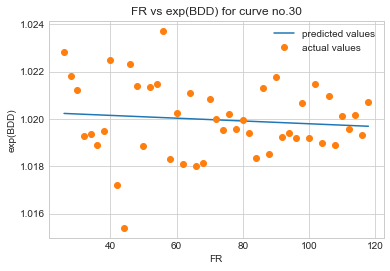

Equation of the line of best fit for curve no. 30: exp_of_BDD_pred = -5.890951529190373e-06*FR + 1.0203836006061964
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.10315143860377271
The Mean-Squared Error is equal to 2.3749385996970017e-06


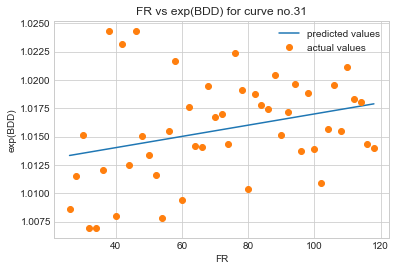

Equation of the line of best fit for curve no. 31: exp_of_BDD_pred = 4.952582834916717e-05*FR + 1.0120437561947928
The correlation coeffcient for FR and exp(BDD) is equal to r =0.3004800775496585
The Mean-Squared Error is equal to 1.818920578844383e-05


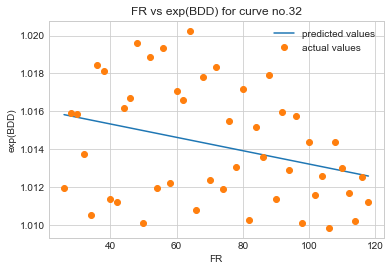

Equation of the line of best fit for curve no. 32: exp_of_BDD_pred = -3.530353088967463e-05*FR + 1.0167373933230508
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.31719087061671164
The Mean-Squared Error is equal to 8.200130703419937e-06


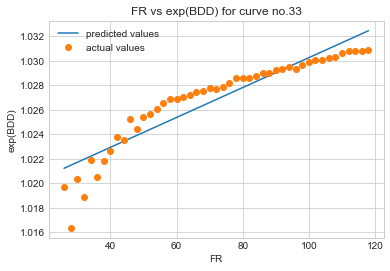

Equation of the line of best fit for curve no. 33: exp_of_BDD_pred = 0.00012184742650963489*FR + 1.0180607816180998
The correlation coeffcient for FR and exp(BDD) is equal to r =0.927592807937132
The Mean-Squared Error is equal to 1.7725267345659092e-06


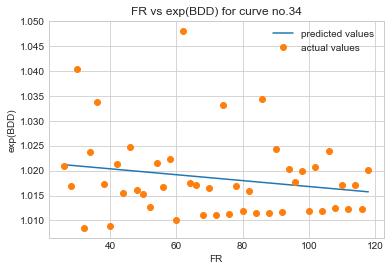

Equation of the line of best fit for curve no. 34: exp_of_BDD_pred = -5.9106397444345236e-05*FR + 1.0227208969709662
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.1964529688667105
The Mean-Squared Error is equal to 6.405256613666202e-05


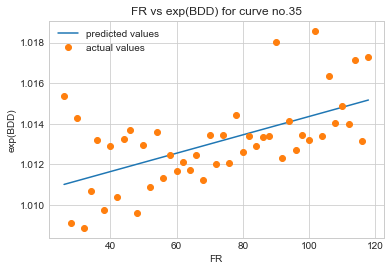

Equation of the line of best fit for curve no. 35: exp_of_BDD_pred = 4.521166787676331e-05*FR + 1.0098350683416386
The correlation coeffcient for FR and exp(BDD) is equal to r =0.5863344173346625
The Mean-Squared Error is equal to 2.87165479635576e-06


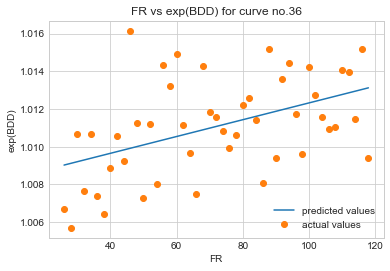

Equation of the line of best fit for curve no. 36: exp_of_BDD_pred = 4.451627649153307e-05*FR + 1.0078724682522886
The correlation coeffcient for FR and exp(BDD) is equal to r =0.46728257006834156
The Mean-Squared Error is equal to 5.221159711144334e-06


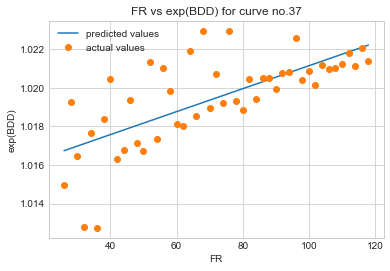

Equation of the line of best fit for curve no. 37: exp_of_BDD_pred = 5.945484188717405e-05*FR + 1.01519250494918
The correlation coeffcient for FR and exp(BDD) is equal to r =0.6955590691080126
The Mean-Squared Error is equal to 2.7758768916337756e-06


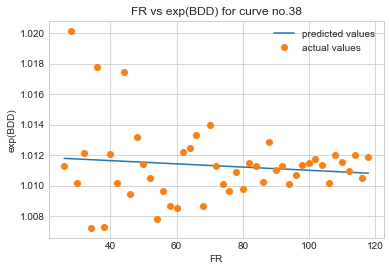

Equation of the line of best fit for curve no. 38: exp_of_BDD_pred = -1.0569283082479595e-05*FR + 1.0120586039803605
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.11982625921488205
The Mean-Squared Error is equal to 5.643959985688363e-06


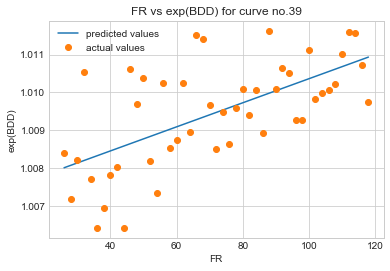

Equation of the line of best fit for curve no. 39: exp_of_BDD_pred = 3.17154181131131e-05*FR + 1.0071904493131218
The correlation coeffcient for FR and exp(BDD) is equal to r =0.6275382903458857
The Mean-Squared Error is equal to 1.139596439154512e-06


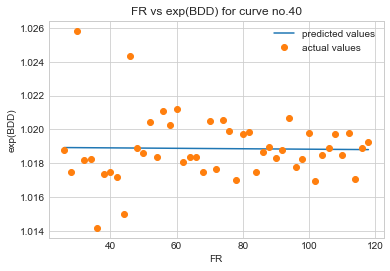

Equation of the line of best fit for curve no. 40: exp_of_BDD_pred = -1.314328875141959e-06*FR + 1.0189563656454672
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.018536175522429865
The Mean-Squared Error is equal to 3.6991028070428006e-06


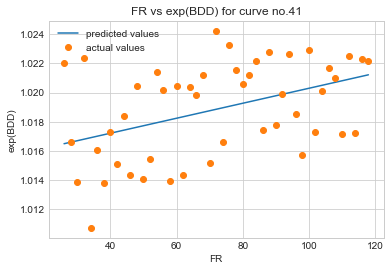

Equation of the line of best fit for curve no. 41: exp_of_BDD_pred = 5.1398860850187106e-05*FR + 1.0151578877008791
The correlation coeffcient for FR and exp(BDD) is equal to r =0.4259872145340518
The Mean-Squared Error is equal to 8.770591234667514e-06


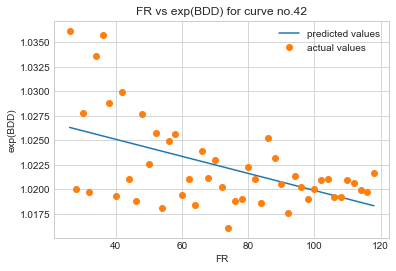

Equation of the line of best fit for curve no. 42: exp_of_BDD_pred = -8.691893795021425e-05*FR + 1.0285812401471368
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.5240075473434724
The Mean-Squared Error is equal to 1.4689896518273008e-05


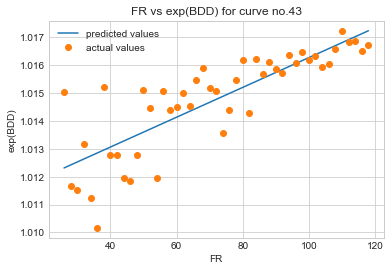

Equation of the line of best fit for curve no. 43: exp_of_BDD_pred = 5.349901447804203e-05*FR + 1.0109229922897975
The correlation coeffcient for FR and exp(BDD) is equal to r =0.822278921304812
The Mean-Squared Error is equal to 1.0089853376164698e-06


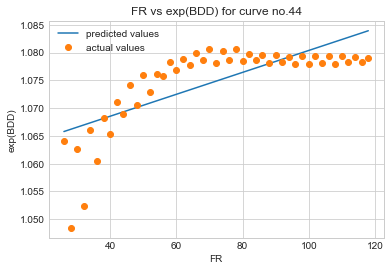

Equation of the line of best fit for curve no. 44: exp_of_BDD_pred = 0.00019732867449863504*FR + 1.0606606932940696
The correlation coeffcient for FR and exp(BDD) is equal to r =0.7345030341984697
The Mean-Squared Error is equal to 2.446277097133669e-05


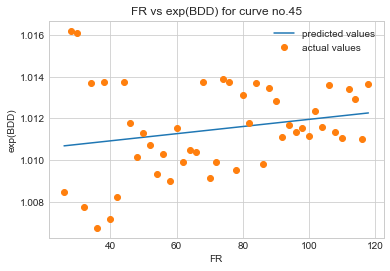

Equation of the line of best fit for curve no. 45: exp_of_BDD_pred = 1.7177957009763277e-05*FR + 1.010237545540139
The correlation coeffcient for FR and exp(BDD) is equal to r =0.21850350492874324
The Mean-Squared Error is equal to 4.331694695586443e-06


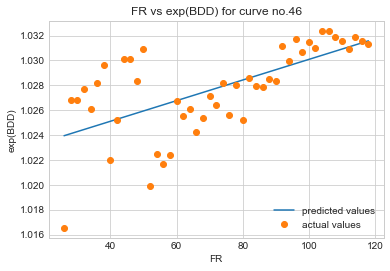

Equation of the line of best fit for curve no. 46: exp_of_BDD_pred = 8.292353091491109e-05*FR + 1.0217869536172695
The correlation coeffcient for FR and exp(BDD) is equal to r =0.6360174678620365
The Mean-Squared Error is equal to 7.450128751227769e-06


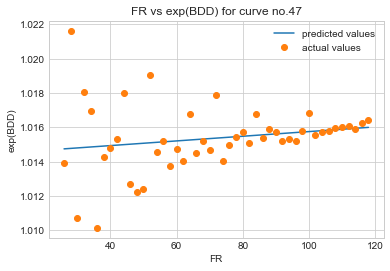

Equation of the line of best fit for curve no. 47: exp_of_BDD_pred = 1.360514906276745e-05*FR + 1.0143989145120031
The correlation coeffcient for FR and exp(BDD) is equal to r =0.1921242539295302
The Mean-Squared Error is equal to 3.5545622882573343e-06


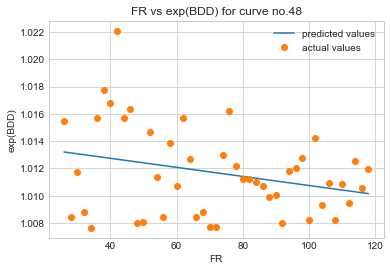

Equation of the line of best fit for curve no. 48: exp_of_BDD_pred = -3.3187258051086114e-05*FR + 1.014067127172975
The correlation coeffcient for FR and exp(BDD) is equal to r =-0.2808297848744846
The Mean-Squared Error is equal to 9.467980070064734e-06


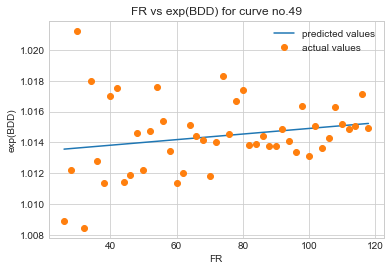

Equation of the line of best fit for curve no. 49: exp_of_BDD_pred = 1.8130727671429258e-05*FR + 1.0130882364154716
The correlation coeffcient for FR and exp(BDD) is equal to r =0.2067372859999669
The Mean-Squared Error is equal to 5.418766482147086e-06
[ 0.95403234 -0.25413874  0.63741268  0.45324302  0.31706277 -0.28543876
  0.30202478  0.67357862  0.52056367  0.07765831  0.07049828  0.79516533
  0.1059666   0.39677273 -0.44512978  0.92435156  0.82726494  0.46177699
  0.91530101  0.83256962  0.88907317  0.58241281  0.53176508  0.27049295
 -0.11486254  0.76002535  0.84454488  0.92585651 -0.31949422  0.41706603
 -0.10315144  0.30048008 -0.31719087  0.92759281 -0.19645297  0.58633442
  0.46728257  0.69555907 -0.11982626  0.62753829 -0.01853618  0.42598721
 -0.52400755  0.82227892  0.73450303  0.2185035   0.63601747  0.19212425
 -0.28082978  0.20673729]
[6.29685718e-07 1.31944887e-05 1.47170026e-06 3.01661028e-06
 2.22757625e-06 5.46087633e-06 3.32738242e-06 1.74981709e-06
 2.42736897e-0

In [25]:
for i in range(50):
    fitLogRegression(i)
    
print(r_values_log)
print(mse_values_log)

#Question: How to obtain a single linear regression models from the 50 models we generated?

(0.0, 20.0)

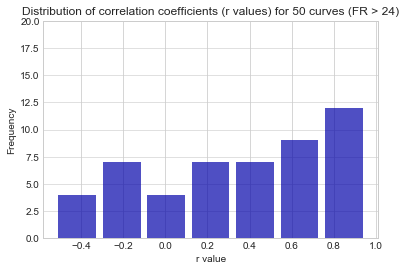

In [26]:
# Plot a histogram for correlation coefficients for 50 curves
n, bins, patches = plt.hist(x= r_values_log, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('r value')
plt.ylabel('Frequency')
plt.title('Distribution of correlation coefficients (r values) for 50 curves (FR > 24)')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

#moreless equally distributed, not skewed to the left as expected

(0.0, 30.0)

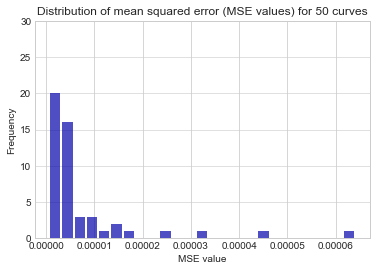

In [27]:
# Plot a histogram for mean squared error values for 50 curves
n, bins, patches = plt.hist(x= mse_values_log, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('MSE value')
plt.ylabel('Frequency')
plt.title('Distribution of mean squared error (MSE values) for 50 curves')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [29]:
#TRY LINEAR REGRESSION

r_values_lin = np.zeros(50)
mse_values_lin = np.zeros(50)

def fitLinearRegression(curve):
    data = FR_test_high[FR_test_high.curve_no == curve]
    data = data[data.FR != 24]
    FR = np.array(data['FR']) #x-axis
    BDD = data['Value'] #y-axis

    def f(x):
    # return math.sqrt(x)
       return float(x)

    FR = np.array([f(xi) for xi in FR])
    BDD = np.array([f(xi) for xi in BDD])
    curve_fit = np.polyfit(FR, BDD, 1)

#1. Linear transformation curve
    plt.plot(FR, curve_fit[0]*FR + curve_fit[1], label = 'predicted values')
    plt.plot(FR, BDD, "o", label = 'actual values')
    plt.title("FR vs BDD for curve no." + str(curve))
    plt.xlabel('FR')
    plt.ylabel('BDD')
    plt.legend()
    plt.show()

#equation fo the line: log(BDD) = curve_fit[0] * FR + curve_fit[1]

    BDD_pred = curve_fit[0] * FR + curve_fit[1]
    print('Equation of the line of best fit for curve no. '+str(curve)+': '+'BDD_pred = '+str(curve_fit[0])+ '*FR '+'+ '+str(curve_fit[1]))

#correlation coef (Pearson's r):
    r_matrix = np.corrcoef(FR, BDD)
    r = r_matrix[0, 1]
    print('The correlation coeffcient for FR and BDD is equal to r =' + str(r))
    r_values_lin[curve] = r

#mean-squared-error
    mse = mean_squared_error(exp_of_BDD, exp_of_BDD_pred) 
    print('The Mean-Squared Error is equal to ' + str(mse))
    mse_values_lin[curve]=mse

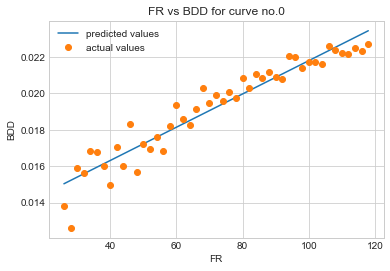

Equation of the line of best fit for curve no. 0: BDD_pred = 9.137371323292108e-05*FR + 0.012660369441032533
The correlation coeffcient for FR and BDD is equal to r =0.9537566880911461
The Mean-Squared Error is equal to 6.296857177710182e-07


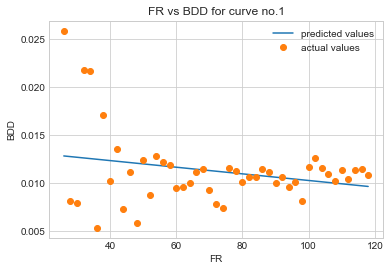

Equation of the line of best fit for curve no. 1: BDD_pred = -3.445976806627279e-05*FR + 0.013711904262013446
The correlation coeffcient for FR and BDD is equal to r =-0.252711406010712
The Mean-Squared Error is equal to 6.296857177710182e-07


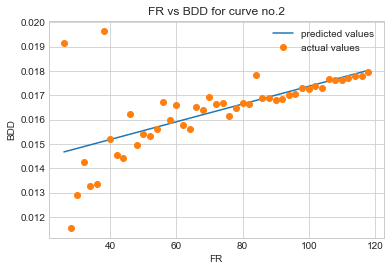

Equation of the line of best fit for curve no. 2: BDD_pred = 3.6431506811522746e-05*FR + 0.013723973112287622
The correlation coeffcient for FR and BDD is equal to r =0.6376724205761899
The Mean-Squared Error is equal to 6.296857177710182e-07


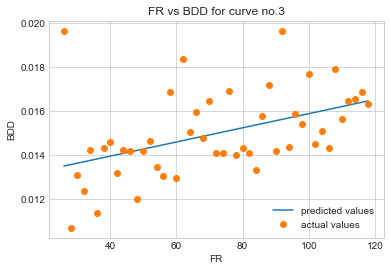

Equation of the line of best fit for curve no. 3: BDD_pred = 3.209457411649135e-05*FR + 0.012678918312394337
The correlation coeffcient for FR and BDD is equal to r =0.4537665422535997
The Mean-Squared Error is equal to 6.296857177710182e-07


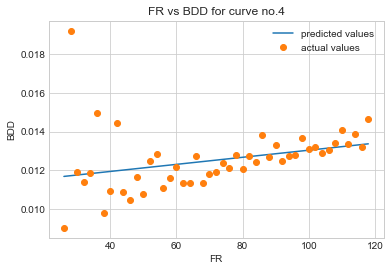

Equation of the line of best fit for curve no. 4: BDD_pred = 1.820711574531378e-05*FR + 0.011221209497096218
The correlation coeffcient for FR and BDD is equal to r =0.31817063899552805
The Mean-Squared Error is equal to 6.296857177710182e-07


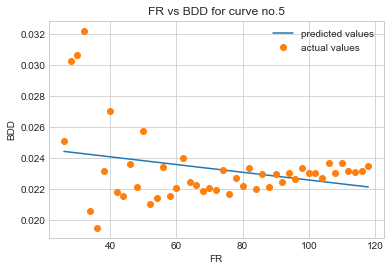

Equation of the line of best fit for curve no. 5: BDD_pred = -2.4926038951250745e-05*FR + 0.025090081508016723
The correlation coeffcient for FR and BDD is equal to r =-0.28462442997625625
The Mean-Squared Error is equal to 6.296857177710182e-07


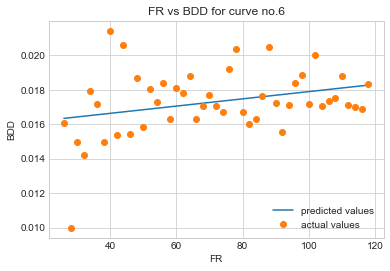

Equation of the line of best fit for curve no. 6: BDD_pred = 2.0990199193813368e-05*FR + 0.015791128118810116
The correlation coeffcient for FR and BDD is equal to r =0.3025499803025087
The Mean-Squared Error is equal to 6.296857177710182e-07


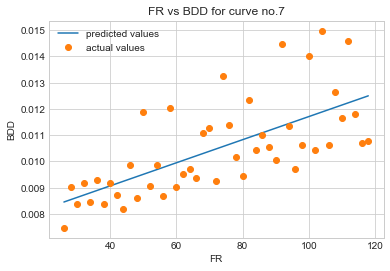

Equation of the line of best fit for curve no. 7: BDD_pred = 4.3963088461928076e-05*FR + 0.007312297336632015
The correlation coeffcient for FR and BDD is equal to r =0.6739222359372078
The Mean-Squared Error is equal to 6.296857177710182e-07


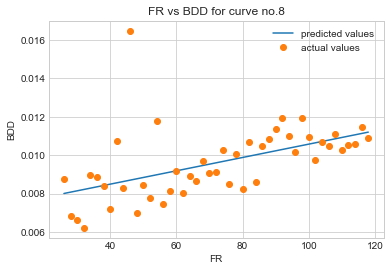

Equation of the line of best fit for curve no. 8: BDD_pred = 3.471245920750204e-05*FR + 0.0071052250575290455
The correlation coeffcient for FR and BDD is equal to r =0.521473712938134
The Mean-Squared Error is equal to 6.296857177710182e-07


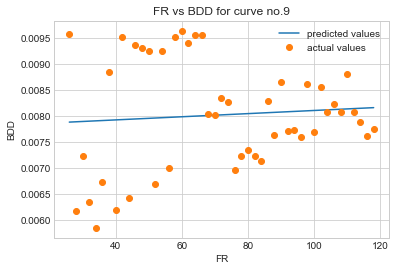

Equation of the line of best fit for curve no. 9: BDD_pred = 3.012131416650958e-06*FR + 0.007803348336790061
The correlation coeffcient for FR and BDD is equal to r =0.07807034603218387
The Mean-Squared Error is equal to 6.296857177710182e-07


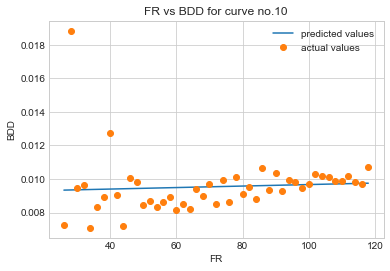

Equation of the line of best fit for curve no. 10: BDD_pred = 4.473199036947351e-06*FR + 0.0092239241048936
The correlation coeffcient for FR and BDD is equal to r =0.07181417655221921
The Mean-Squared Error is equal to 6.296857177710182e-07


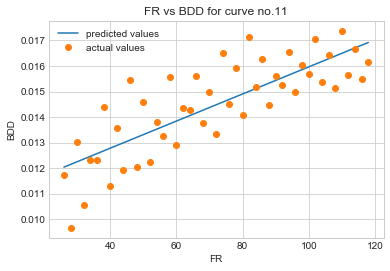

Equation of the line of best fit for curve no. 11: BDD_pred = 5.3061899360906744e-05*FR + 0.010658219711239652
The correlation coeffcient for FR and BDD is equal to r =0.7951026110374904
The Mean-Squared Error is equal to 6.296857177710182e-07


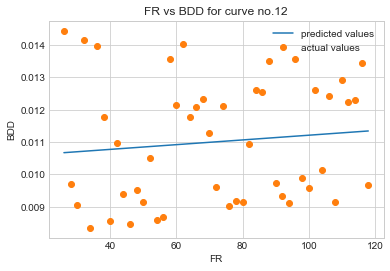

Equation of the line of best fit for curve no. 12: BDD_pred = 7.300961544731257e-06*FR + 0.010483913125951334
The correlation coeffcient for FR and BDD is equal to r =0.10624371562813362
The Mean-Squared Error is equal to 6.296857177710182e-07


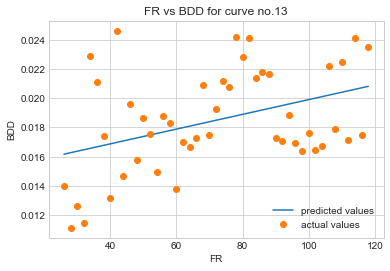

Equation of the line of best fit for curve no. 13: BDD_pred = 5.044233741388994e-05*FR + 0.014859416026373251
The correlation coeffcient for FR and BDD is equal to r =0.3973823396088435
The Mean-Squared Error is equal to 6.296857177710182e-07


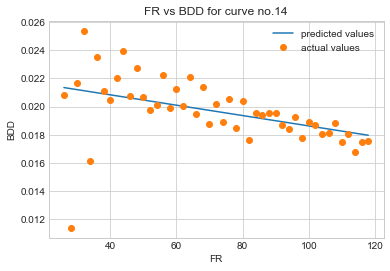

Equation of the line of best fit for curve no. 14: BDD_pred = -3.672986820962339e-05*FR + 0.022302518795624452
The correlation coeffcient for FR and BDD is equal to r =-0.44393697615238886
The Mean-Squared Error is equal to 6.296857177710182e-07


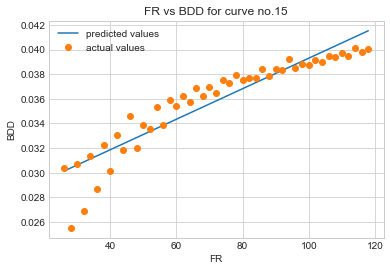

Equation of the line of best fit for curve no. 15: BDD_pred = 0.00012380001340579633*FR + 0.026913766377839803
The correlation coeffcient for FR and BDD is equal to r =0.9236744959505583
The Mean-Squared Error is equal to 6.296857177710182e-07


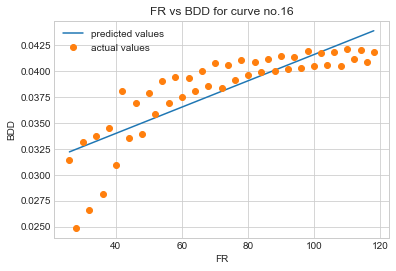

Equation of the line of best fit for curve no. 16: BDD_pred = 0.0001269462538854463*FR + 0.028899581241455096
The correlation coeffcient for FR and BDD is equal to r =0.826336526508282
The Mean-Squared Error is equal to 6.296857177710182e-07


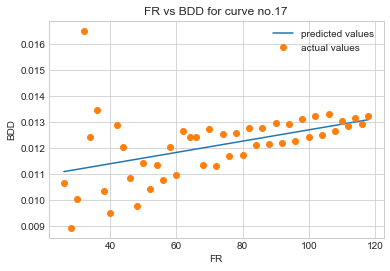

Equation of the line of best fit for curve no. 17: BDD_pred = 2.1702019705054388e-05*FR + 0.01053575129711023
The correlation coeffcient for FR and BDD is equal to r =0.462371059202478
The Mean-Squared Error is equal to 6.296857177710182e-07


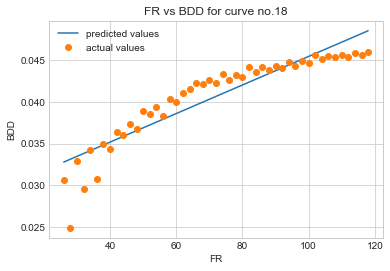

Equation of the line of best fit for curve no. 18: BDD_pred = 0.00017110224009431486*FR + 0.028340356469225576
The correlation coeffcient for FR and BDD is equal to r =0.9142776478682934
The Mean-Squared Error is equal to 6.296857177710182e-07


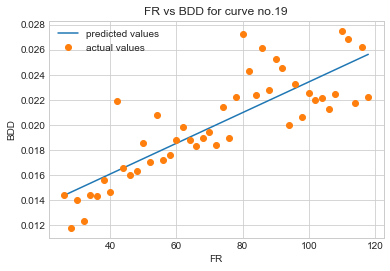

Equation of the line of best fit for curve no. 19: BDD_pred = 0.00012215387884015512*FR + 0.011211957206050586
The correlation coeffcient for FR and BDD is equal to r =0.8329316126505368
The Mean-Squared Error is equal to 6.296857177710182e-07


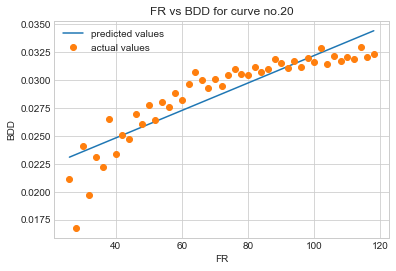

Equation of the line of best fit for curve no. 20: BDD_pred = 0.00012318530684290777*FR + 0.019890246354457883
The correlation coeffcient for FR and BDD is equal to r =0.8882766045139953
The Mean-Squared Error is equal to 6.296857177710182e-07


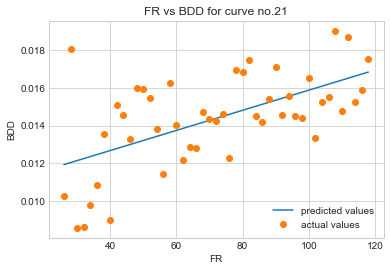

Equation of the line of best fit for curve no. 21: BDD_pred = 5.3116363581105914e-05*FR + 0.010556092143785244
The correlation coeffcient for FR and BDD is equal to r =0.5826194180648977
The Mean-Squared Error is equal to 6.296857177710182e-07


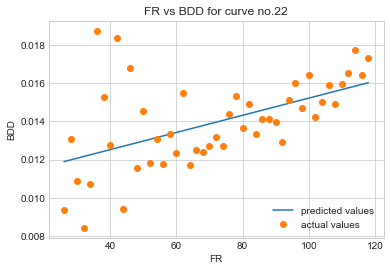

Equation of the line of best fit for curve no. 22: BDD_pred = 4.4819381652280816e-05*FR + 0.01073070743084171
The correlation coeffcient for FR and BDD is equal to r =0.5322436388549694
The Mean-Squared Error is equal to 6.296857177710182e-07


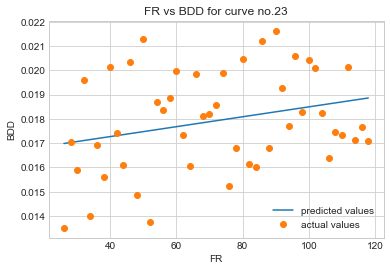

Equation of the line of best fit for curve no. 23: BDD_pred = 2.0397865296840515e-05*FR + 0.016456098540806298
The correlation coeffcient for FR and BDD is equal to r =0.2708108565363715
The Mean-Squared Error is equal to 6.296857177710182e-07


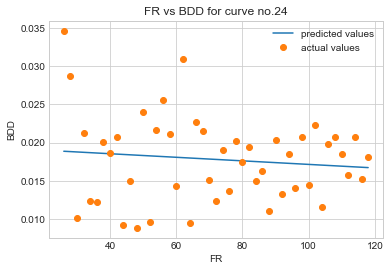

Equation of the line of best fit for curve no. 24: BDD_pred = -2.3245588141136635e-05*FR + 0.019477231071253813
The correlation coeffcient for FR and BDD is equal to r =-0.11304094614177555
The Mean-Squared Error is equal to 6.296857177710182e-07


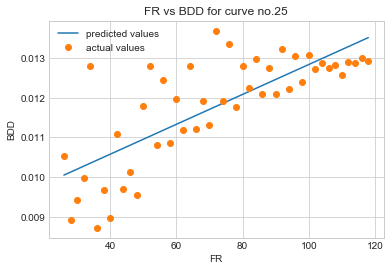

Equation of the line of best fit for curve no. 25: BDD_pred = 3.756532623457789e-05*FR + 0.009076948016800599
The correlation coeffcient for FR and BDD is equal to r =0.7600037478354309
The Mean-Squared Error is equal to 6.296857177710182e-07


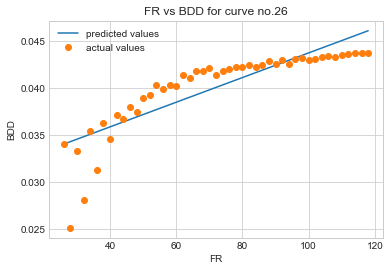

Equation of the line of best fit for curve no. 26: BDD_pred = 0.00013127834471830585*FR + 0.030644944168402407
The correlation coeffcient for FR and BDD is equal to r =0.8433001114491656
The Mean-Squared Error is equal to 6.296857177710182e-07


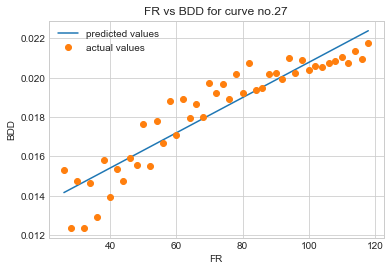

Equation of the line of best fit for curve no. 27: BDD_pred = 8.94917316053634e-05*FR + 0.011832478390328253
The correlation coeffcient for FR and BDD is equal to r =0.9255541483117357
The Mean-Squared Error is equal to 6.296857177710182e-07


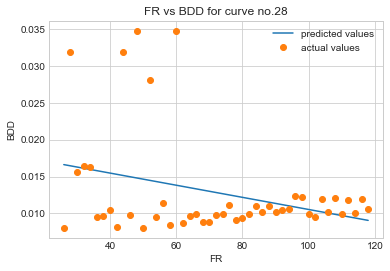

Equation of the line of best fit for curve no. 28: BDD_pred = -8.210657500967936e-05*FR + 0.01875527294495965
The correlation coeffcient for FR and BDD is equal to r =-0.31922716170078147
The Mean-Squared Error is equal to 6.296857177710182e-07


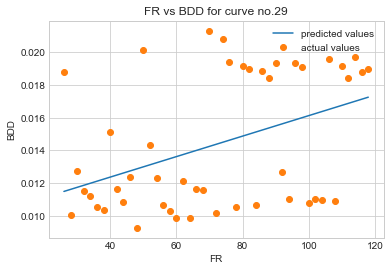

Equation of the line of best fit for curve no. 29: BDD_pred = 6.259084882431065e-05*FR + 0.009869249965056502
The correlation coeffcient for FR and BDD is equal to r =0.41704594454701277
The Mean-Squared Error is equal to 6.296857177710182e-07


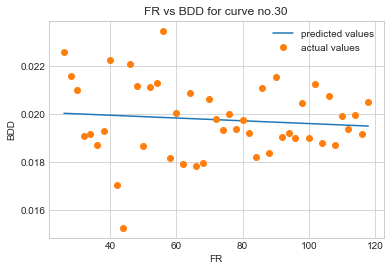

Equation of the line of best fit for curve no. 30: BDD_pred = -5.749132508447267e-06*FR + 0.02017565734940328
The correlation coeffcient for FR and BDD is equal to r =-0.10266905223962844
The Mean-Squared Error is equal to 6.296857177710182e-07


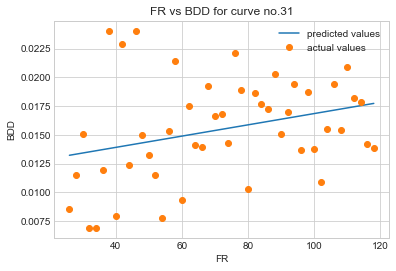

Equation of the line of best fit for curve no. 31: BDD_pred = 4.898055273041395e-05*FR + 0.011952744131496816
The correlation coeffcient for FR and BDD is equal to r =0.3017466074187638
The Mean-Squared Error is equal to 6.296857177710182e-07


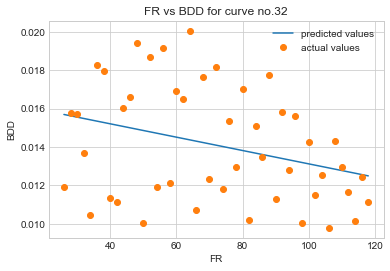

Equation of the line of best fit for curve no. 32: BDD_pred = -3.478245145680813e-05*FR + 0.016595633117742942
The correlation coeffcient for FR and BDD is equal to r =-0.317089290080957
The Mean-Squared Error is equal to 6.296857177710182e-07


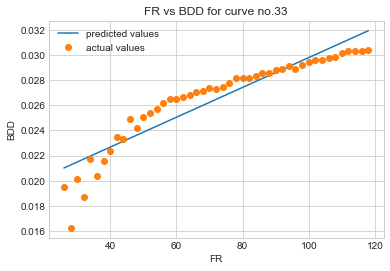

Equation of the line of best fit for curve no. 33: BDD_pred = 0.00011880291776769629*FR + 0.01792023590721495
The correlation coeffcient for FR and BDD is equal to r =0.9269104168195015
The Mean-Squared Error is equal to 6.296857177710182e-07


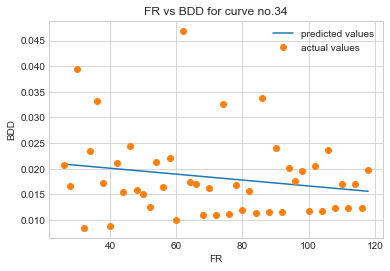

Equation of the line of best fit for curve no. 34: BDD_pred = -5.757019673175329e-05*FR + 0.022410035661971105
The correlation coeffcient for FR and BDD is equal to r =-0.1961282701521129
The Mean-Squared Error is equal to 6.296857177710182e-07


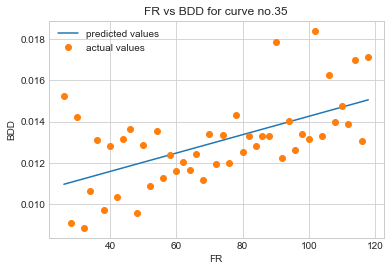

Equation of the line of best fit for curve no. 35: BDD_pred = 4.462243621131435e-05*FR + 0.009790424824865938
The correlation coeffcient for FR and BDD is equal to r =0.5865419838162252
The Mean-Squared Error is equal to 6.296857177710182e-07


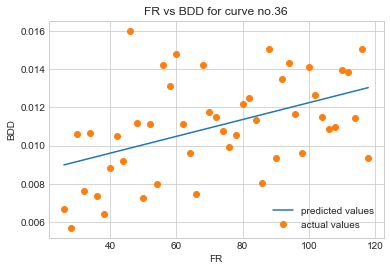

Equation of the line of best fit for curve no. 36: BDD_pred = 4.407076682343232e-05*FR + 0.007840369718921108
The correlation coeffcient for FR and BDD is equal to r =0.46767593476886343
The Mean-Squared Error is equal to 6.296857177710182e-07


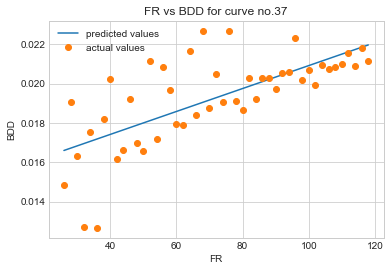

Equation of the line of best fit for curve no. 37: BDD_pred = 5.838125797068454e-05*FR + 0.015080034003085833
The correlation coeffcient for FR and BDD is equal to r =0.6954485403884212
The Mean-Squared Error is equal to 6.296857177710182e-07


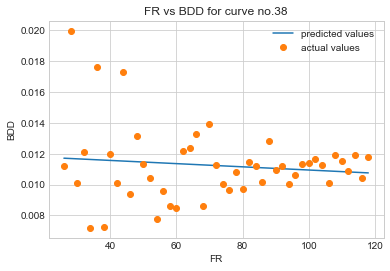

Equation of the line of best fit for curve no. 38: BDD_pred = -1.0341172254619688e-05*FR + 0.011976045734284428
The correlation coeffcient for FR and BDD is equal to r =-0.11877599364646646
The Mean-Squared Error is equal to 6.296857177710182e-07


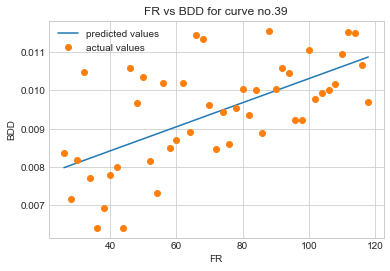

Equation of the line of best fit for curve no. 39: BDD_pred = 3.143098771429317e-05*FR + 0.007165409034501311
The correlation coeffcient for FR and BDD is equal to r =0.6276157059028092
The Mean-Squared Error is equal to 6.296857177710182e-07


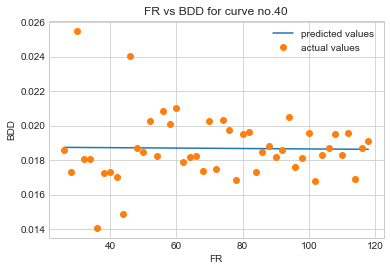

Equation of the line of best fit for curve no. 40: BDD_pred = -1.2332210458561594e-06*FR + 0.018773068959073685
The correlation coeffcient for FR and BDD is equal to r =-0.017737421366549544
The Mean-Squared Error is equal to 6.296857177710182e-07


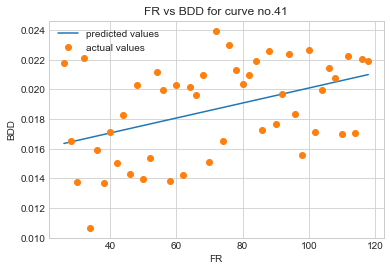

Equation of the line of best fit for curve no. 41: BDD_pred = 5.05103920215807e-05*FR + 0.015041072921046075
The correlation coeffcient for FR and BDD is equal to r =0.42623645186350234
The Mean-Squared Error is equal to 6.296857177710182e-07


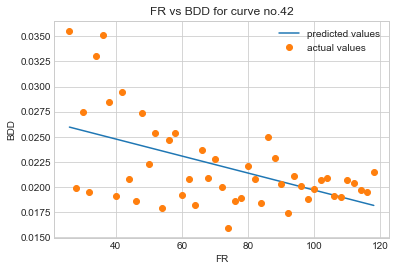

Equation of the line of best fit for curve no. 42: BDD_pred = -8.468561763267342e-05*FR + 0.028165284678981634
The correlation coeffcient for FR and BDD is equal to r =-0.523734891988901
The Mean-Squared Error is equal to 6.296857177710182e-07


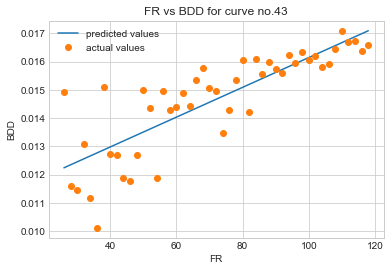

Equation of the line of best fit for curve no. 43: BDD_pred = 5.274339595721377e-05*FR + 0.01086779676228501
The correlation coeffcient for FR and BDD is equal to r =0.8220234516387285
The Mean-Squared Error is equal to 6.296857177710182e-07


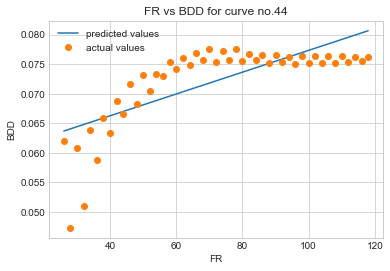

Equation of the line of best fit for curve no. 44: BDD_pred = 0.00018449242748456727*FR + 0.05889154255352869
The correlation coeffcient for FR and BDD is equal to r =0.7331318909716916
The Mean-Squared Error is equal to 6.296857177710182e-07


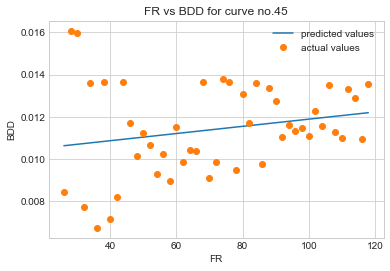

Equation of the line of best fit for curve no. 45: BDD_pred = 1.704625247407891e-05*FR + 0.010179473735726247
The correlation coeffcient for FR and BDD is equal to r =0.21929880506180957
The Mean-Squared Error is equal to 6.296857177710182e-07


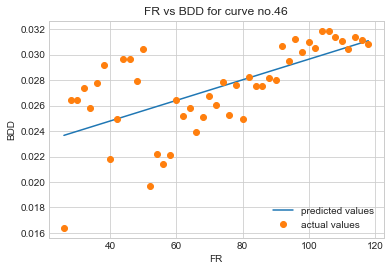

Equation of the line of best fit for curve no. 46: BDD_pred = 8.074228117954432e-05*FR + 0.021559814174189985
The correlation coeffcient for FR and BDD is equal to r =0.6354399431230154
The Mean-Squared Error is equal to 6.296857177710182e-07


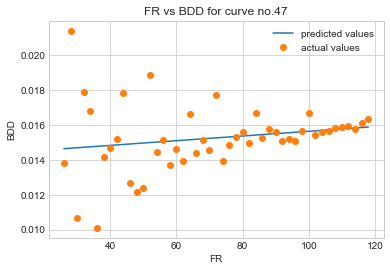

Equation of the line of best fit for curve no. 47: BDD_pred = 1.3470076968834672e-05*FR + 0.014289799552155065
The correlation coeffcient for FR and BDD is equal to r =0.19315503497721587
The Mean-Squared Error is equal to 6.296857177710182e-07


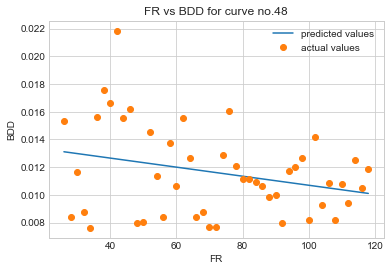

Equation of the line of best fit for curve no. 48: BDD_pred = -3.268640586024036e-05*FR + 0.013958396315624854
The correlation coeffcient for FR and BDD is equal to r =-0.28021157923910106
The Mean-Squared Error is equal to 6.296857177710182e-07


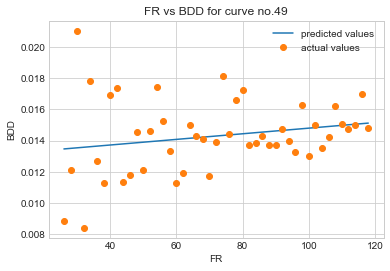

Equation of the line of best fit for curve no. 49: BDD_pred = 1.7963991559741738e-05*FR + 0.01299488595014106
The correlation coeffcient for FR and BDD is equal to r =0.20780094014506106
The Mean-Squared Error is equal to 6.296857177710182e-07
[ 0.95375669 -0.25271141  0.63767242  0.45376654  0.31817064 -0.28462443
  0.30254998  0.67392224  0.52147371  0.07807035  0.07181418  0.79510261
  0.10624372  0.39738234 -0.44393698  0.9236745   0.82633653  0.46237106
  0.91427765  0.83293161  0.8882766   0.58261942  0.53224364  0.27081086
 -0.11304095  0.76000375  0.84330011  0.92555415 -0.31922716  0.41704594
 -0.10266905  0.30174661 -0.31708929  0.92691042 -0.19612827  0.58654198
  0.46767593  0.69544854 -0.11877599  0.62761571 -0.01773742  0.42623645
 -0.52373489  0.82202345  0.73313189  0.21929881  0.63543994  0.19315503
 -0.28021158  0.20780094]
[6.29685718e-07 6.29685718e-07 6.29685718e-07 6.29685718e-07
 6.29685718e-07 6.29685718e-07 6.29685718e-07 6.29685718e-07
 6.29685718e-07 6.296857

In [30]:
for i in range(50):
    fitLinearRegression(i)
    
print(r_values_lin)
print(mse_values_lin)

(0.0, 20.0)

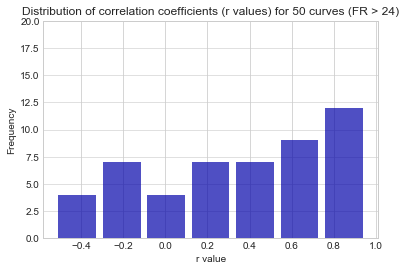

In [31]:
# Plot a histogram for correlation coefficients for 50 curves
n, bins, patches = plt.hist(x= r_values_lin, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('r value')
plt.ylabel('Frequency')
plt.title('Distribution of correlation coefficients (r values) for 50 curves (FR > 24)')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [34]:
r_values_some = np.zeros(50)
mse_values_some = np.zeros(50)

def fitSomeReg(curve):
    data = FR_test_high[FR_test_high.curve_no == curve]
    data = data[data.FR != 24]
    FR = np.array(data['FR']) #x-axis
    BDD = data['Value'] #y-axis

    def f(x):
    # return math.sqrt(x)
       return float(x)

    FR = np.array([f(xi) for xi in FR])
    BDD = np.array([f(xi) for xi in BDD])

    log_of_FR = np.log(FR) #log-y-axis
    curve_fit = np.polyfit(log_of_FR, BDD, 1)

#1. Linear transformation curve
    plt.plot(log_of_FR, curve_fit[0]*log_of_FR + curve_fit[1], label = 'predicted values')
    plt.plot(log_of_FR, BDD, "o", label = 'actual values')
    plt.title("log(FR) vs (BDD) for curve no." + str(curve))
    plt.xlabel('log(FR)')
    plt.ylabel('BDD')
    plt.legend()
    plt.show()

#equation fo the line: log(BDD) = curve_fit[0] * FR + curve_fit[1]

    BDD_pred = curve_fit[0] * log_of_FR + curve_fit[1]
    print('Equation of the line of best fit for curve no. '+str(curve)+': '+'log_of_BDD_pred = '+str(curve_fit[0])+ '*FR '+'+ '+str(curve_fit[1]))

#correlation coef (Pearson's r):
    r_matrix = np.corrcoef(log_of_FR, BDD)
    r = r_matrix[0, 1]
    print('The correlation coeffcient for FR and log(BDD) is equal to r =' + str(r))
    r_values_some[curve] = r

#mean-squared-error
    mse = mean_squared_error(BDD, BDD_pred) 
    print('The Mean-Squared Error is equal to ' + str(mse))
    mse_values_some[curve]=mse

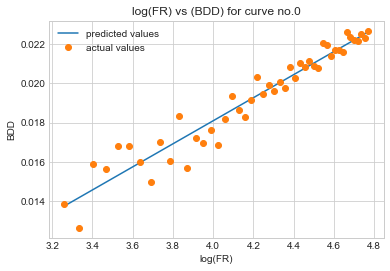

Equation of the line of best fit for curve no. 0: log_of_BDD_pred = 0.005899040876780478*FR + -0.00550212046602233
The correlation coeffcient for FR and log(BDD) is equal to r =0.9635014780692969
The Mean-Squared Error is equal to 4.841185005937694e-07


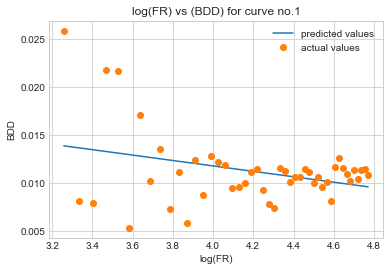

Equation of the line of best fit for curve no. 1: log_of_BDD_pred = -0.002818358617397438*FR + 0.02305138868562087
The correlation coeffcient for FR and log(BDD) is equal to r =-0.32341741729233486
The Mean-Squared Error is equal to 1.2253791485705909e-05


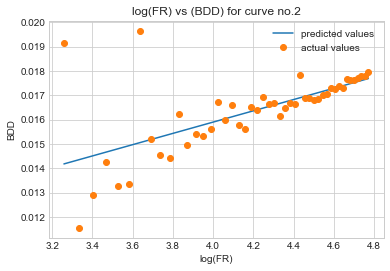

Equation of the line of best fit for curve no. 2: log_of_BDD_pred = 0.00231704877579964*FR + 0.0066290170238237
The correlation coeffcient for FR and log(BDD) is equal to r =0.6346150006365924
The Mean-Squared Error is equal to 1.4348384564532483e-06


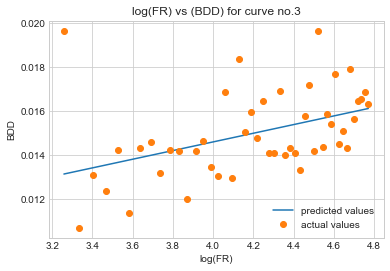

Equation of the line of best fit for curve no. 3: log_of_BDD_pred = 0.0019639718206524597*FR + 0.0067525568888488945
The correlation coeffcient for FR and log(BDD) is equal to r =0.43450098277097626
The Mean-Squared Error is equal to 2.9868183564927754e-06


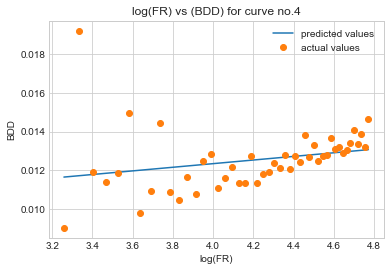

Equation of the line of best fit for curve no. 4: log_of_BDD_pred = 0.0009311059498582487*FR + 0.008626934076066961
The correlation coeffcient for FR and log(BDD) is equal to r =0.2546083873970088
The Mean-Squared Error is equal to 2.2538894379276026e-06


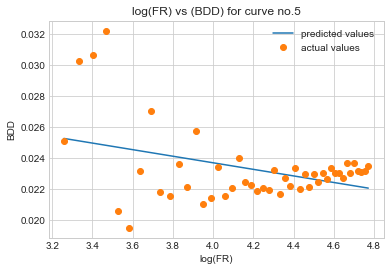

Equation of the line of best fit for curve no. 5: log_of_BDD_pred = -0.002119131108682344*FR + 0.03218333708080835
The correlation coeffcient for FR and log(BDD) is equal to r =-0.37864426974065
The Mean-Squared Error is equal to 4.835401414531529e-06


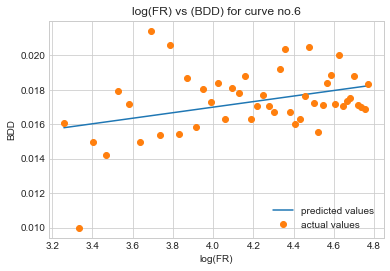

Equation of the line of best fit for curve no. 6: log_of_BDD_pred = 0.0016097316483647398*FR + 0.010550984214138784
The correlation coeffcient for FR and log(BDD) is equal to r =0.3630686153839646
The Mean-Squared Error is equal to 3.075580111071475e-06


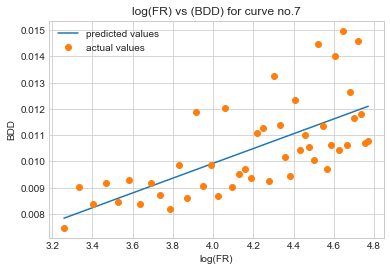

Equation of the line of best fit for curve no. 7: log_of_BDD_pred = 0.002819805535594326*FR + -0.0013490165944922705
The correlation coeffcient for FR and log(BDD) is equal to r =0.6763872423945395
The Mean-Squared Error is equal to 1.699161317975179e-06


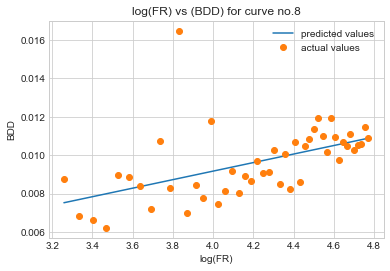

Equation of the line of best fit for curve no. 8: log_of_BDD_pred = 0.002220847544617284*FR + 0.0002899788747760167
The correlation coeffcient for FR and log(BDD) is equal to r =0.5220600278357522
The Mean-Squared Error is equal to 2.372405225885382e-06


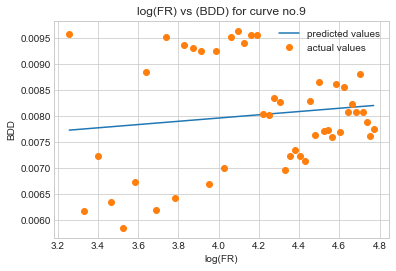

Equation of the line of best fit for curve no. 9: log_of_BDD_pred = 0.0003124406257512068*FR + 0.006709802392772216
The correlation coeffcient for FR and log(BDD) is equal to r =0.126716843078474
The Mean-Squared Error is equal to 1.0780112867367473e-06


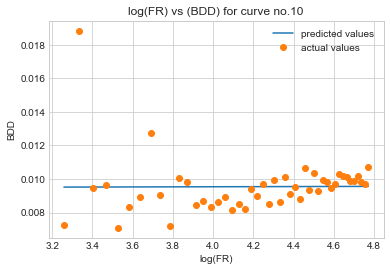

Equation of the line of best fit for curve no. 10: log_of_BDD_pred = 2.7983527971112576e-05*FR + 0.009428627630216024
The correlation coeffcient for FR and log(BDD) is equal to r =0.007029899010635861
The Mean-Squared Error is equal to 2.8554359732629095e-06


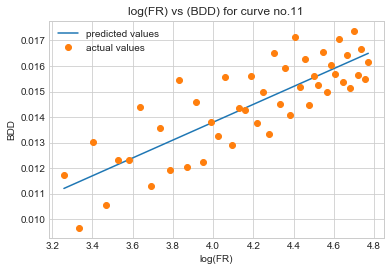

Equation of the line of best fit for curve no. 11: log_of_BDD_pred = 0.0034989293345366918*FR + -0.00019631942954407503
The correlation coeffcient for FR and log(BDD) is equal to r =0.8204086237147128
The Mean-Squared Error is equal to 1.0716461327487988e-06


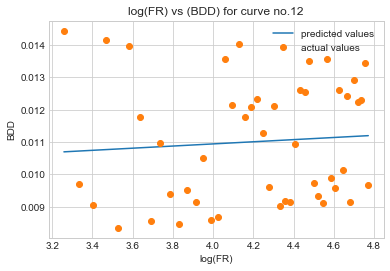

Equation of the line of best fit for curve no. 12: log_of_BDD_pred = 0.0003310713215068163*FR + 0.009621023223944558
The correlation coeffcient for FR and log(BDD) is equal to r =0.07538751179951247
The Mean-Squared Error is equal to 3.455860302329444e-06


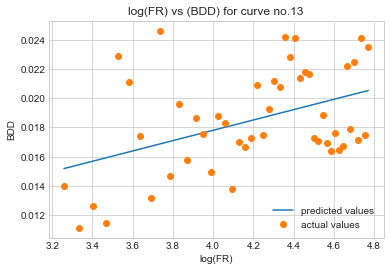

Equation of the line of best fit for curve no. 13: log_of_BDD_pred = 0.003531721516549721*FR + 0.0036787334567292703
The correlation coeffcient for FR and log(BDD) is equal to r =0.4353659582709621
The Mean-Squared Error is equal to 9.61127039724941e-06


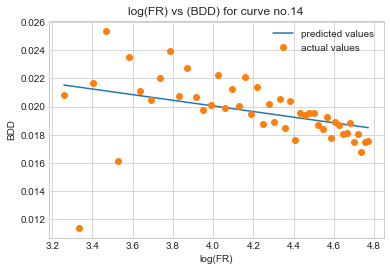

Equation of the line of best fit for curve no. 14: log_of_BDD_pred = -0.0019976674623750465*FR + 0.02803646324872016
The correlation coeffcient for FR and log(BDD) is equal to r =-0.37781552762159065
The Mean-Squared Error is equal to 4.3190094926258944e-06


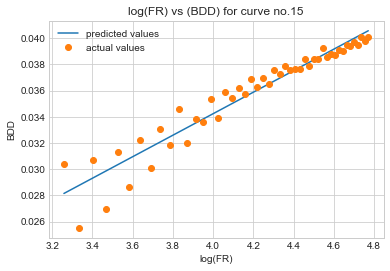

Equation of the line of best fit for curve no. 15: log_of_BDD_pred = 0.008205194617017401*FR + 0.001413640797632273
The correlation coeffcient for FR and log(BDD) is equal to r =0.9579477116147338
The Mean-Squared Error is equal to 1.088609241312196e-06


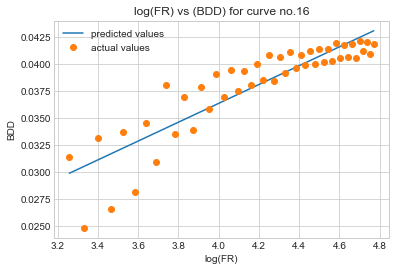

Equation of the line of best fit for curve no. 16: log_of_BDD_pred = 0.00868594992981615*FR + 0.0016096303806575646
The correlation coeffcient for FR and log(BDD) is equal to r =0.8847265076239189
The Mean-Squared Error is equal to 3.773822614453119e-06


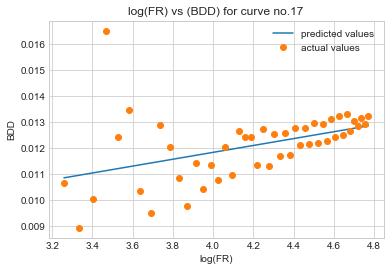

Equation of the line of best fit for curve no. 17: log_of_BDD_pred = 0.0013218774329548843*FR + 0.006554159053382785
The correlation coeffcient for FR and log(BDD) is equal to r =0.44069318555984716
The Mean-Squared Error is equal to 1.3065271781487742e-06


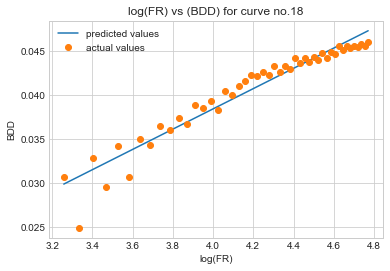

Equation of the line of best fit for curve no. 18: log_of_BDD_pred = 0.011521890594800004*FR + -0.00766469265996512
The correlation coeffcient for FR and log(BDD) is equal to r =0.9633870658797308
The Mean-Squared Error is equal to 1.8529916417936018e-06


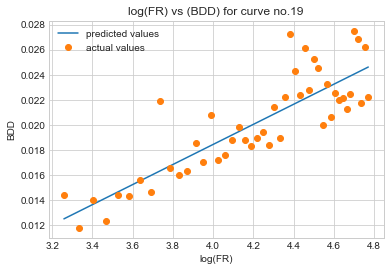

Equation of the line of best fit for curve no. 19: log_of_BDD_pred = 0.007993640364834723*FR + -0.013519402128354749
The correlation coeffcient for FR and log(BDD) is equal to r =0.8529063466371876
The Mean-Squared Error is equal to 4.314406395916382e-06


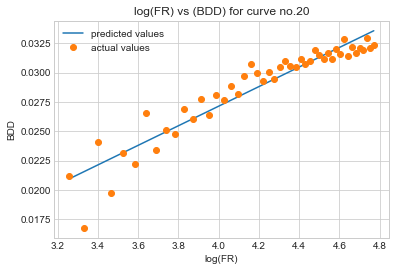

Equation of the line of best fit for curve no. 20: log_of_BDD_pred = 0.008350274758107679*FR + -0.006262624372606517
The correlation coeffcient for FR and log(BDD) is equal to r =0.9422035522136826
The Mean-Squared Error is equal to 1.5888945570100676e-06


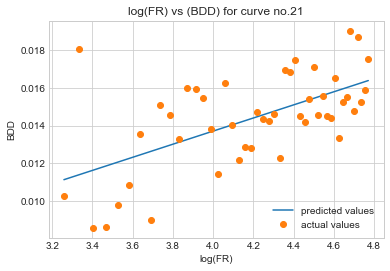

Equation of the line of best fit for curve no. 21: log_of_BDD_pred = 0.0034605332427627886*FR + -0.00013348702812539102
The correlation coeffcient for FR and log(BDD) is equal to r =0.59395603984545
The Mean-Squared Error is equal to 3.95925951066887e-06


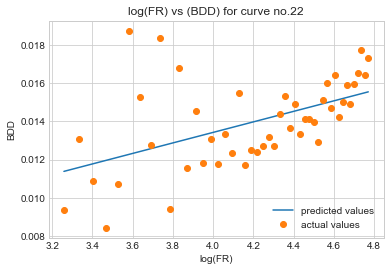

Equation of the line of best fit for curve no. 22: log_of_BDD_pred = 0.0027463761411971282*FR + 0.0024390196944171017
The correlation coeffcient for FR and log(BDD) is equal to r =0.5103396294931077
The Mean-Squared Error is equal to 3.85974089028316e-06


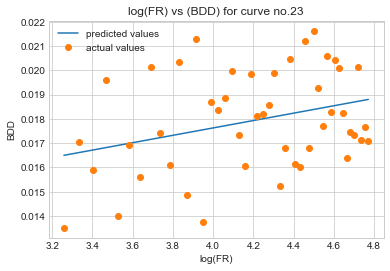

Equation of the line of best fit for curve no. 23: log_of_BDD_pred = 0.0015232353277734938*FR + 0.011536084184988644
The correlation coeffcient for FR and log(BDD) is equal to r =0.316448478721987
The Mean-Squared Error is equal to 3.7574242406406763e-06


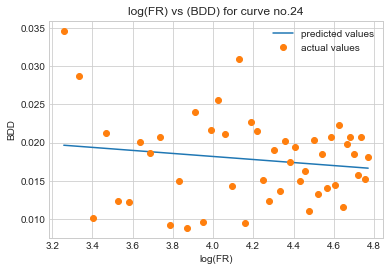

Equation of the line of best fit for curve no. 24: log_of_BDD_pred = -0.0019843131106944355*FR + 0.026126033682403363
The correlation coeffcient for FR and log(BDD) is equal to r =-0.15099414393123312
The Mean-Squared Error is equal to 3.0413830701707327e-05


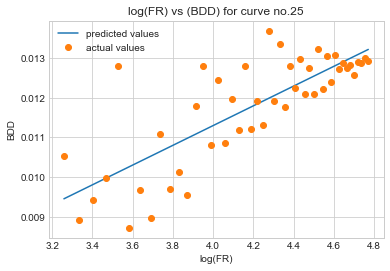

Equation of the line of best fit for curve no. 25: log_of_BDD_pred = 0.0024822220661339144*FR + 0.0013708671920814222
The correlation coeffcient for FR and log(BDD) is equal to r =0.7858214123997793
The Mean-Squared Error is equal to 6.877565771202176e-07


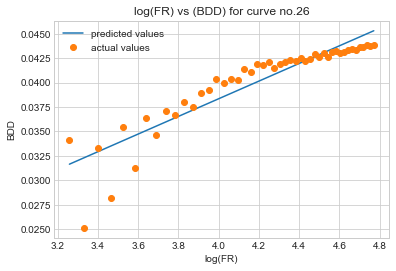

Equation of the line of best fit for curve no. 26: log_of_BDD_pred = 0.009027609742536035*FR + 0.002233935110654055
The correlation coeffcient for FR and log(BDD) is equal to r =0.907437033884255
The Mean-Squared Error is equal to 3.149105107668184e-06


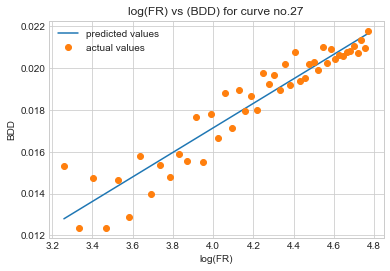

Equation of the line of best fit for curve no. 27: log_of_BDD_pred = 0.005854895654213612*FR + -0.006280362995357558
The correlation coeffcient for FR and log(BDD) is equal to r =0.9475294934318065
The Mean-Squared Error is equal to 7.031359034231719e-07


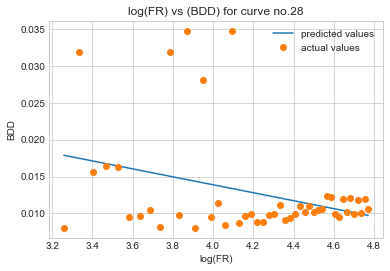

Equation of the line of best fit for curve no. 28: log_of_BDD_pred = -0.0053879940861962525*FR + 0.035441595541355224
The correlation coeffcient for FR and log(BDD) is equal to r =-0.32779601371826017
The Mean-Squared Error is equal to 4.345767203092253e-05


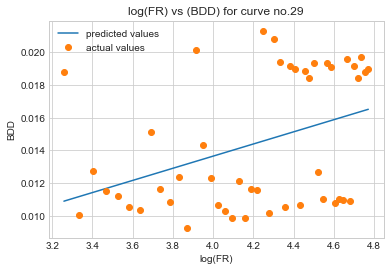

Equation of the line of best fit for curve no. 29: log_of_BDD_pred = 0.00371080616223801*FR + -0.0011878456754457855
The correlation coeffcient for FR and log(BDD) is equal to r =0.3868975570815808
The Mean-Squared Error is equal to 1.4096429442795683e-05


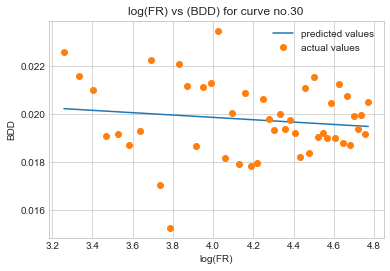

Equation of the line of best fit for curve no. 30: log_of_BDD_pred = -0.00048766246838495407*FR + 0.021807043974374347
The correlation coeffcient for FR and log(BDD) is equal to r =-0.13627344163093863
The Mean-Squared Error is equal to 2.2649701102188163e-06


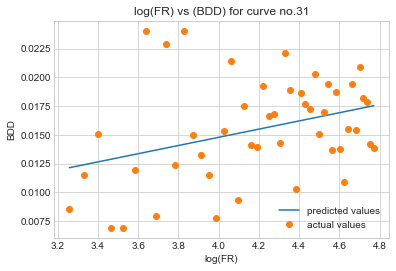

Equation of the line of best fit for curve no. 31: log_of_BDD_pred = 0.003560465931682301*FR + 0.000546254992804858
The correlation coeffcient for FR and log(BDD) is equal to r =0.34322602144242126
The Mean-Squared Error is equal to 1.7108243385333676e-05


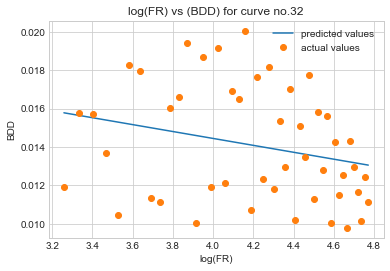

Equation of the line of best fit for curve no. 32: log_of_BDD_pred = -0.0018020825649470334*FR + 0.021649481335704344
The correlation coeffcient for FR and log(BDD) is equal to r =-0.25706960379568544
The Mean-Squared Error is equal to 8.27070432052281e-06


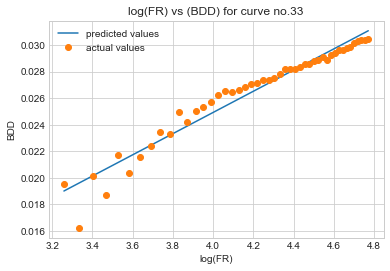

Equation of the line of best fit for curve no. 33: log_of_BDD_pred = 0.007972210727079859*FR + -0.006962513745467261
The correlation coeffcient for FR and log(BDD) is equal to r =0.9732940827064591
The Mean-Squared Error is equal to 6.371707277907663e-07


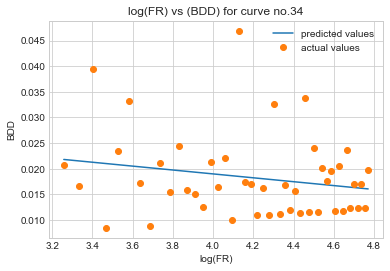

Equation of the line of best fit for curve no. 34: log_of_BDD_pred = -0.0037948566892232706*FR + 0.03418113784428416
The correlation coeffcient for FR and log(BDD) is equal to r =-0.20229843418147558
The Mean-Squared Error is equal to 6.081988179046631e-05


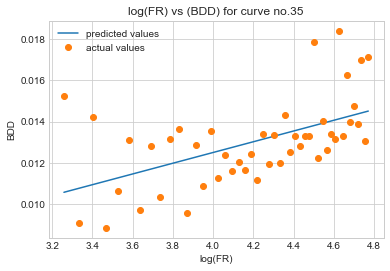

Equation of the line of best fit for curve no. 35: log_of_BDD_pred = 0.0026102738975042248*FR + 0.002055388741627588
The correlation coeffcient for FR and log(BDD) is equal to r =0.5368915442959049
The Mean-Squared Error is equal to 3.0318805956699156e-06


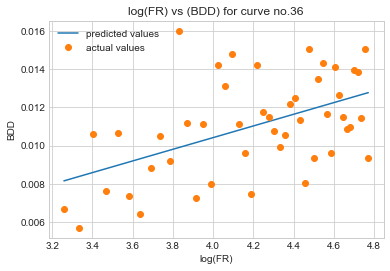

Equation of the line of best fit for curve no. 36: log_of_BDD_pred = 0.0030599640660732884*FR + -0.0018204496231739153
The correlation coeffcient for FR and log(BDD) is equal to r =0.5081189588545435
The Mean-Squared Error is equal to 4.848246203567098e-06


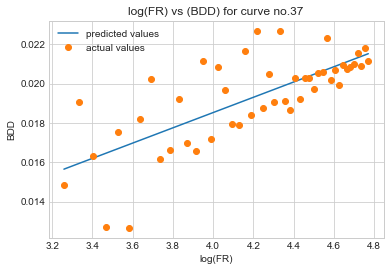

Equation of the line of best fit for curve no. 37: log_of_BDD_pred = 0.0038845309970189914*FR + 0.002991221720541925
The correlation coeffcient for FR and log(BDD) is equal to r =0.7240770789216514
The Mean-Squared Error is equal to 2.4673977763281256e-06


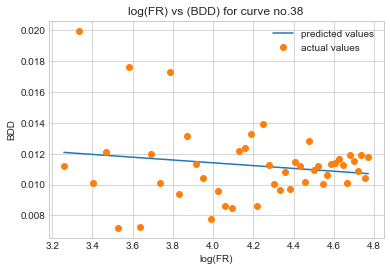

Equation of the line of best fit for curve no. 38: log_of_BDD_pred = -0.0009089940174987477*FR + 0.01504392856930936
The correlation coeffcient for FR and log(BDD) is equal to r =-0.16337085511938657
The Mean-Squared Error is equal to 5.430141961439169e-06


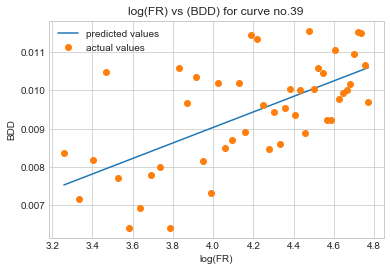

Equation of the line of best fit for curve no. 39: log_of_BDD_pred = 0.0020271737447596296*FR + 0.0009261917367682747
The correlation coeffcient for FR and log(BDD) is equal to r =0.6334048789929116
The Mean-Squared Error is equal to 1.1053168608941407e-06


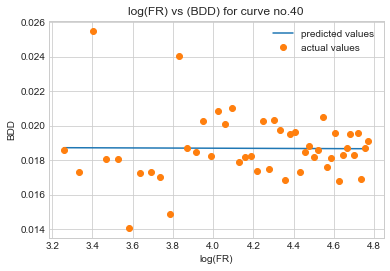

Equation of the line of best fit for curve no. 40: log_of_BDD_pred = -3.962628098806092e-05*FR + 0.018850475173321217
The correlation coeffcient for FR and log(BDD) is equal to r =-0.008918411921386423
The Mean-Squared Error is equal to 3.5574938589951445e-06


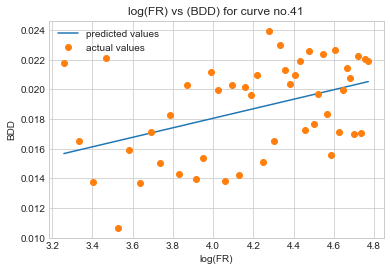

Equation of the line of best fit for curve no. 41: log_of_BDD_pred = 0.003209151761150094*FR + 0.0052181926666196535
The correlation coeffcient for FR and log(BDD) is equal to r =0.42375492771049517
The Mean-Squared Error is equal to 8.479701831010215e-06


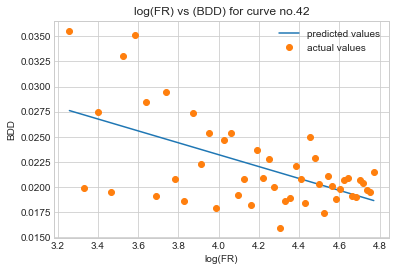

Equation of the line of best fit for curve no. 42: log_of_BDD_pred = -0.005917333420399222*FR + 0.04688603893940814
The correlation coeffcient for FR and log(BDD) is equal to r =-0.572641141967954
The Mean-Squared Error is equal to 1.2932916088133136e-05


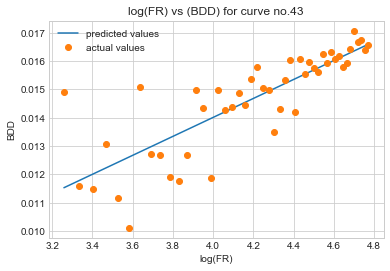

Equation of the line of best fit for curve no. 43: log_of_BDD_pred = 0.003349220014396151*FR + 0.0006182270710439321
The correlation coeffcient for FR and log(BDD) is equal to r =0.8167976016939408
The Mean-Squared Error is equal to 1.0085171304848633e-06


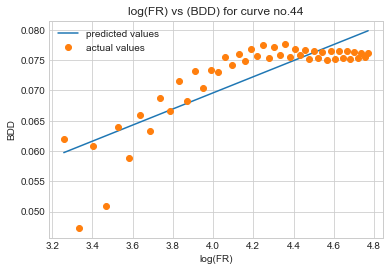

Equation of the line of best fit for curve no. 44: log_of_BDD_pred = 0.01330336279603109*FR + 0.01637884492334644
The correlation coeffcient for FR and log(BDD) is equal to r =0.8272173954810357
The Mean-Squared Error is equal to 1.4715022110194193e-05


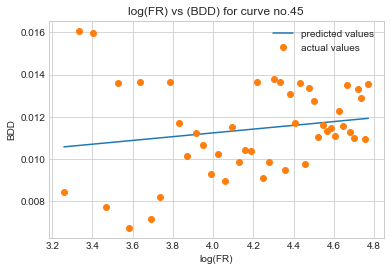

Equation of the line of best fit for curve no. 45: log_of_BDD_pred = 0.0008949582570746289*FR + 0.007653224606349029
The correlation coeffcient for FR and log(BDD) is equal to r =0.18016265999387013
The Mean-Squared Error is equal to 4.302616923736002e-06


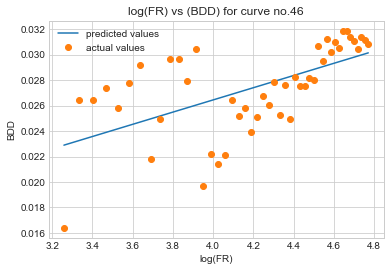

Equation of the line of best fit for curve no. 46: log_of_BDD_pred = 0.004788329763356664*FR + 0.0072903379307090125
The correlation coeffcient for FR and log(BDD) is equal to r =0.5896743060225835
The Mean-Squared Error is equal to 7.751177653713872e-06


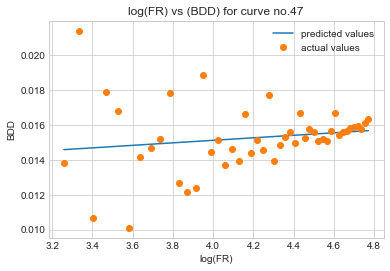

Equation of the line of best fit for curve no. 47: log_of_BDD_pred = 0.0007206767404288436*FR + 0.012237026688086974
The correlation coeffcient for FR and log(BDD) is equal to r =0.16170785597001885
The Mean-Squared Error is equal to 3.485765961207898e-06


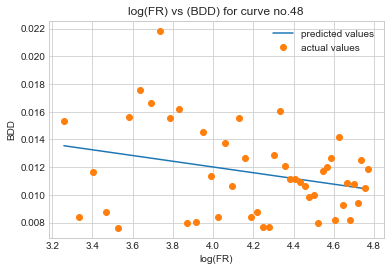

Equation of the line of best fit for curve no. 48: log_of_BDD_pred = -0.0020708425352930645*FR + 0.020290376483242268
The correlation coeffcient for FR and log(BDD) is equal to r =-0.2777925810714305
The Mean-Squared Error is equal to 9.241922118761535e-06


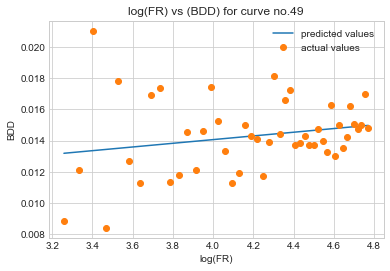

Equation of the line of best fit for curve no. 49: log_of_BDD_pred = 0.0011797655234088988*FR + 0.00934019277867155
The correlation coeffcient for FR and log(BDD) is equal to r =0.21354776162587435
The Mean-Squared Error is equal to 5.249497209946212e-06


In [35]:
for i in range(50):
    fitSomeReg(i)